<a href="https://colab.research.google.com/github/FactorMouk/Data-Science-Projeto-1/blob/main/DataScienceProjeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primeiro Projeto de Data Science**

Aluno: João Vitor Oliveira de Araújo (jvoa)

Este projeto caracteriza-se como uma análise, visualização e tratamento de dados de um dataset do [Atlas de Desenvolvimento Humano das Regiões Metropolitanas Brasileiras](https://onedrive.live.com/?authkey=%21AMBepFonxCEmzk4&cid=124653557C0404EC&id=124653557C0404EC%2122993&parId=124653557C0404EC%2122848&o=OneUp), considerando a Região Metropolitana do Recife.

# 1. Coleta de Dados

**Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
from math import nan, isnan
import matplotlib.pyplot as plt

**Criando dataset**

Iremos utilizar o dataset do IDH dos bairros da RMR, considerando os anos de 2000 à 2010:

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_excel('/content/drive/MyDrive/DataScience/RM 62600 Recife - Base UDH 2000_2010.xlsx')
data.head()

,Cod_ID,UDH_Atlas,NOME_UDH,CODMUN6,NOME_MUN,CODUF,NOME_UF,CODRM,NOME_RM,ANO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FBBAS,T_FBFUND,T_FBMED,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ0A5,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ5A6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQMED1824,T_FUND11A13,T_FUND15A17,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,RDPC1,RDPC10,RDPC2,RDPC3,RDPC4,RDPC5,RDPCT,RIND,RMPOB,RPOB,THEIL,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_SERV,P_SIUP,P_TRANSF,CPR,EMP,P_FORMAL,TRABCC,TRABPUB,TRABSC,P_FUND,P_MED,P_SUPER,REN0,REN1,REN2,REN3,REN5,RENOCUP,THEILtrab,T_ATIV,T_ATIV1014,T_ATIV1517,T_ATIV1824,T_ATIV18M,T_ATIV2529,T_DES,T_DES1014,T_DES1517,T_DES1824,T_DES18M,T_DES2529,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,PAREDE,T_CRIFUNDIN_TODOS,T_FORA0A5,T_FORA6A14,T_FUNDIN_TODOS,T_FUNDIN_TODOS_MMEIO,T_FUNDIN18MINF,T_M10A17CF,T_MULCHEFEFIF014,T_NESTUDA_NTRAB_MMEIO,T_OCUPDESLOC_1,T_RMAXIDOSO,T_SLUZ,T_VULNERA_NESTUDA_NTRAB_MMEIO,T_VULNERA_MULCHEFE,T_VULNERA_RMAXIDOSO,T_VULNERA_OCUPDESLOC_13,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA,PEA1014,PEA1517,PEA18M,PESO1,PESO1114,PESO1113,PESO1214,PESO13,PESO15,PESO1517,PESO1524,PESO1618,PESO18,PESO1820,PESO1824,PESO1921,PESO25,PESO4,PESO5,PESO6,PESO610,PESO617,PESO65,PESOM1014,PESOM1517,PESOM15M,PESOM25M,PESORUR,PESOTOT,PESOURB,PIA,PIA1014,PIA1517,PIA18M,POP,POPT,MULCHEFEFDOM,DOMVULNERACOMID,POPVULNERAVEL15A24,OCUPMMEIOD,T_FBFUND_tudo,T_FBMED_tudo,T_FBBAS_tudo,T_FLFUND_tudo,T_FLMED_tudo,T_FLBAS_tudo,T_FUND11A13_tudo,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1.260005e+12,1.260005e+12,Centro / Alto da Bela Vista / Timbó : BR 101,260005.0,Abreu E Lima (PE),26.0,PE,62600.0,RM Recife (PE),2000.0,68.90,1.95,39.5,50.04,88.96,75.03,47.56,7.18,9.56,3.12,2.30,12.08,4.30,12.88,4.65,15.02,27.47,18.83,118.00,127.19,93.01,5.71,89.04,91.23,33.74,1.96,38.06,87.88,36.77,9.71,85.49,93.61,92.07,46.74,12.50,18.72,72.50,40.83,58.59,45.08,41.49,22.16,26.94,23.60,22.72,2.07,117.13,183.50,292.81,460.69,694.67,0.48,8.88,13.32,24.22,34.20,54.43,67.53,36.65,4.04,53.35,12.88,26.16,46.65,73.94,11.38,8.28,347.30,70.09,1272.85,153.59,230.62,355.74,926.45,349.88,42.58,79.86,139.18,0.41,2.02,17.26,5.13,0.0,50.76,0.71,20.70,21.58,1.90,60.40,48.69,7.08,19.59,52.96,33.08,3.44,1.17,48.13,79.25,88.63,95.81,848.39,0.40,NaN,4.74,18.81,60.93,60.29,74.12,NaN,72.66,50.29,44.19,26.06,29.15,98.99,91.95,36.73,89.81,100.00,4.94,NaN,35.33,61.94,6.39,29.79,21.06,44.66,4.73,51.36,18.34,NaN,4.10,0.00,33.16,21.47,57.33,NaN,198.0,191.0,229.0,207.0,205.0,197.0,174.0,146.0,102.0,85.0,68.0,183.0,66.0,49.0,41.0,26.0,20.0,2185.0,194.0,210.0,227.0,242.0,228.0,216.0,194.0,165.0,123.0,104.0,86.0,185.0,77.0,73.0,51.0,31.0,42.0,2446.0,NaN,19.0,49.0,1935.0,85.0,310.0,229.0,239.0,228.0,3471.0,261.0,904.0,288.0,3210.0,278.0,643.0,263.0,2568.0,80.0,74.0,91.0,384.0,955.0,333.0,210.0,128.0,1858.0,1390.0,0.0,4631.0,4631.0,3872.0,401.0,261.0,3210.0,4627.166667,NaN,NaN,NaN,NaN,NaN,128.90,109.35,123.64,93.61,40.43,92.07,84.72,0.451,0.552,0.612,0.516,0.732,0.606
1,1.260005e+12,1.260005e+12,Desterro / Matinha / Fosfato : Vila da Caixa /...,260005.0,Abreu E Lima (PE),26.0,PE,62600.0,RM Recife (PE),2000.0,68.90,1.95,39.5,50.04,88.96,75.03,48.59,5.68,9.56,4.70,2.21,11.63,3.55,12.40,4.27,14.75,27.47,18.83,118.00,127.19,93.01,5.71,89.04,91.23,33.74,1.96,38.06,87.8

Vamos também utilizar o dicionário de nomes e definições por coluna para facilitar a leitura e visualização dos dados.

In [ ]:
dic = pd.read_excel('/content/drive/MyDrive/DataScience/A - DICIONÁRIO dos indicadores do Atlas.xlsx')
dic.head()

,SIGLA,NOME,DEFINIÇÃO
0,CODMUN6,Código do Município,Código utilizado pelo IBGE para identificação ...
1,CODMUN7,Código do Município,Código utilizado pelo IBGE para identificação ...
2,NOMEMUN,Nome do município,Nome do município.
3,CODUF,Código da Unidade da Federação,Código utilizado pelo IBGE para identificação ...
4,SIGLAUF,Sigla da Unidade da Federação,Sigla da Unidade da Federação.


# 2. Análise Descritiva e Pré-processamento dos dados

## Renomeando colunas e  Definição de tipos

Vamos renomear algumas colunas para adequá-las ao dicionário.


In [ ]:
old_columns = list(data.columns.values)
new_columns = list(map(lambda column: column.upper().replace('COD_ID', 'ID'), old_columns))
data = data.rename(columns = dict(zip(old_columns, new_columns)))
list(data.columns.values)

['ID',
 'UDH_ATLAS',
 'NOME_UDH',
 'CODMUN6',
 'NOME_MUN',
 'CODUF',
 'NOME_UF',
 'CODRM',
 'NOME_RM',
 'ANO',
 'ESPVIDA',
 'FECTOT',
 'MORT1',
 'MORT5',
 'SOBRE40',
 'SOBRE60',
 'RAZDEP',
 'T_ENV',
 'E_ANOSESTUDO',
 'T_ANALF11A14',
 'T_ANALF15A17',
 'T_ANALF15M',
 'T_ANALF18A24',
 'T_ANALF18M',
 'T_ANALF25A29',
 'T_ANALF25M',
 'T_ATRASO_2_BASICO',
 'T_ATRASO_2_FUND',
 'T_FBBAS',
 'T_FBFUND',
 'T_FBMED',
 'T_FBSUPER',
 'T_FLBAS',
 'T_FLFUND',
 'T_FLMED',
 'T_FLSUPER',
 'T_FREQ0A5',
 'T_FREQ15A17',
 'T_FREQ18A24',
 'T_FREQ25A29',
 'T_FREQ5A6',
 'T_FREQ6A14',
 'T_FREQ6A17',
 'T_FREQFUND1517',
 'T_FREQFUND1824',
 'T_FREQMED1824',
 'T_FUND11A13',
 'T_FUND15A17',
 'T_FUND18A24',
 'T_FUND18M',
 'T_FUND25M',
 'T_MED18A20',
 'T_MED18A24',
 'T_MED18M',
 'T_MED25M',
 'T_SUPER25M',
 'CORTE1',
 'CORTE2',
 'CORTE3',
 'CORTE4',
 'CORTE9',
 'GINI',
 'PIND',
 'PINDCRI',
 'PMPOB',
 'PMPOBCRI',
 'PPOB',
 'PPOBCRI',
 'PREN10RICOS',
 'PREN20',
 'PREN20RICOS',
 'PREN40',
 'PREN60',
 'PREN80',
 'PRENTRAB',


Vamos também fazer uma modificação nos nomes dos valores das siglas no dicionário, para manter um determinado padrão.

In [ ]:
old_values = list(dic['SIGLA'].values)
new_values = list(map(lambda value: value.upper().replace(' ', ''), old_values))
dic['SIGLA'] = dic['SIGLA'].map(dict(zip(old_values, new_values)))
dic['SIGLA'].values

array(['CODMUN6', 'CODMUN7', 'NOMEMUN', 'CODUF', 'SIGLAUF', 'UFN',
       'MICRO', 'MESO', 'ALTITUDE', 'LATITUDE', 'LONGITUDE', 'ANOINST',
       'CODRM', 'SIGLARM', 'NOMERM', 'ID', 'DIVISÃO', 'ANO', 'AREA',
       'DENSIDADE', 'ESPVIDA', 'FECTOT', 'MORT1', 'MORT5', 'SOBRE40',
       'SOBRE60', 'RAZDEP', 'T_ENV', 'E_ANOSESTUDO', 'T_ANALF11A14',
       'T_ANALF15A17', 'T_ANALF15M', 'T_ANALF18A24', 'T_ANALF18M',
       'T_ANALF25A29', 'T_ANALF25M', 'T_ATRASO_2_BASICO',
       'T_ATRASO_2_FUND', 'T_FBBAS', 'T_FBBAS_TUDO', 'T_FBFUND',
       'T_FBFUND_TUDO', 'T_FBMED', 'T_FBMED_TUDO', 'T_FBSUPER', 'T_FLBAS',
       'T_FLBAS_TUDO', 'T_FLFUND', 'T_FLFUND_TUDO', 'T_FLMED',
       'T_FLMED_TUDO', 'T_FLSUPER', 'T_FREQ0A5', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FREQ25A29', 'T_FREQ5A6', 'T_FREQ6A14',
       'T_FREQ6A17', 'T_FREQFUND1517', 'T_FREQFUND1824', 'T_FREQMED1824',
       'T_FUND11A13', 'T_FUND11A13_TUDO', 'T_FUND15A17', 'T_FUND18A24',
       'T_FUND18M', 'T_FUND25M', 'T_MED18A20', 'T_M

Vamos visualizar as colunas que não estão associadas diretamente a um valor no dicionário e entender o porquê disso ter acontecido.

In [ ]:
diff_columns = list(set(data.columns.values) - set(dic['SIGLA'].values))
diff_columns

['NOME_UDH', 'NOME_UF', 'UDH_ATLAS', 'NOME_MUN', 'NOME_RM']

Não precisamos das colunas CODUF, NOME_UF, CODRM e NOME_RM, pois todas são redudantes e repetidas, considerando que todos os bairros estão na RMR e em PE.

In [ ]:
data = data.drop(columns = ['CODUF', 'NOME_UF', 'CODRM', 'NOME_RM'])

Percebemos que as colunas UDH_ATLAS e ID têm as mesmas informações.

In [ ]:
all(data['UDH_ATLAS'].values == data['ID'].values)

True

Vamo remover ambas as colunas.

In [ ]:
data = data.drop(columns = ['ID', 'UDH_ATLAS'])

Já a coluna NOME_UDH de fato não se encontra no dicionário. Esta coluna se trata do nome do Bairro (ou Unidade de Desenvolvimento Humano). Vamos adicionar essa descrição no dicionário.

In [ ]:
dic.loc[-1] = ['NOME_UDH','Nome da UDH (ou Bairro)', 'Nome da UDH (ou Bairro)']
dic.index = dic.index + 1
dic = dic.sort_index()
dic.head()

,SIGLA,NOME,DEFINIÇÃO
0,NOME_UDH,Nome da UDH (ou Bairro),Nome da UDH (ou Bairro)
1,CODMUN6,Código do Município,Código utilizado pelo IBGE para identificação ...
2,CODMUN7,Código do Município,Código utilizado pelo IBGE para identificação ...
3,NOMEMUN,Nome do município,Nome do município.
4,CODUF,Código da Unidade da Federação,Código utilizado pelo IBGE para identificação ...


Por último, decidimos por remover ou alterar algumas colunas que não apresentam dados tão interessantes para o processo de análise e visualização, considerando seus significados vistos no dicionário e certas redundâncias de significado.

In [ ]:
data = data.drop(columns=["PESO1", "PESO1114", "PESO1113", "PESO1214", "PESO13", "PESO15", "PESO1517", "PESO1524", 
                          "PESO1618", "PESO18", "PESO1820", "PESO1824", "PESO1921", "PESO25", "PESO4", "PESO5", "PESO6", 
                          "PESO610", "PESO617", "PESO65", "PESOM1014", "PESOM1517", "PESOM15M", "PESOM25M",
                          "PIA", "PIA1014", "PIA1517", "PIA18M", "RDPC1", "RDPC10", "RDPC2", "RDPC3", "RDPC4", 
                          "RDPC5", "RDPCT", "RIND", "RMPOB", "RPOB", "P_FORMAL", "TRABCC", 
                          "TRABPUB", "TRABSC", "P_FUND", "P_MED", "P_SUPER", "REN0", "REN1", "REN2", "REN3", "REN5", "RENOCUP", 
                          "THEILTRAB", "T_ATIV", "T_ATIV1014", "T_ATIV1517", "T_ATIV1824", "T_ATIV18M", "T_ATIV2529", "T_DES", 
                          "T_DES1014", "T_DES1517", "T_DES1824", "T_DES18M", "T_DES2529", "T_CRIFUNDIN_TODOS", "T_FORA0A5", 
                          "T_FORA6A14", "T_FUNDIN_TODOS", "T_FUNDIN_TODOS_MMEIO", "T_FUNDIN18MINF", "T_M10A17CF", "T_MULCHEFEFIF014", 
                          "T_NESTUDA_NTRAB_MMEIO", "T_OCUPDESLOC_1", "T_RMAXIDOSO", "T_VULNERA_NESTUDA_NTRAB_MMEIO", "T_VULNERA_MULCHEFE", 
                          "T_VULNERA_RMAXIDOSO", "T_VULNERA_OCUPDESLOC_13", "T_FBFUND_TUDO", "T_FBMED_TUDO", "T_FBBAS_TUDO", "T_FLFUND_TUDO", 
                          "T_FLMED_TUDO", "T_FLBAS_TUDO", "T_FUND11A13_TUDO"])

list(data.columns.values)

['NOME_UDH',
 'CODMUN6',
 'NOME_MUN',
 'ANO',
 'ESPVIDA',
 'FECTOT',
 'MORT1',
 'MORT5',
 'SOBRE40',
 'SOBRE60',
 'RAZDEP',
 'T_ENV',
 'E_ANOSESTUDO',
 'T_ANALF11A14',
 'T_ANALF15A17',
 'T_ANALF15M',
 'T_ANALF18A24',
 'T_ANALF18M',
 'T_ANALF25A29',
 'T_ANALF25M',
 'T_ATRASO_2_BASICO',
 'T_ATRASO_2_FUND',
 'T_FBBAS',
 'T_FBFUND',
 'T_FBMED',
 'T_FBSUPER',
 'T_FLBAS',
 'T_FLFUND',
 'T_FLMED',
 'T_FLSUPER',
 'T_FREQ0A5',
 'T_FREQ15A17',
 'T_FREQ18A24',
 'T_FREQ25A29',
 'T_FREQ5A6',
 'T_FREQ6A14',
 'T_FREQ6A17',
 'T_FREQFUND1517',
 'T_FREQFUND1824',
 'T_FREQMED1824',
 'T_FUND11A13',
 'T_FUND15A17',
 'T_FUND18A24',
 'T_FUND18M',
 'T_FUND25M',
 'T_MED18A20',
 'T_MED18A24',
 'T_MED18M',
 'T_MED25M',
 'T_SUPER25M',
 'CORTE1',
 'CORTE2',
 'CORTE3',
 'CORTE4',
 'CORTE9',
 'GINI',
 'PIND',
 'PINDCRI',
 'PMPOB',
 'PMPOBCRI',
 'PPOB',
 'PPOBCRI',
 'PREN10RICOS',
 'PREN20',
 'PREN20RICOS',
 'PREN40',
 'PREN60',
 'PREN80',
 'PRENTRAB',
 'R1040',
 'R2040',
 'RDPC',
 'THEIL',
 'P_AGRO',
 'P_COM',
 'P_C

**Verificando tipos das colunas**

In [ ]:
data.dtypes

NOME_UDH               object
CODMUN6               float64
NOME_MUN               object
ANO                   float64
ESPVIDA               float64
FECTOT                float64
MORT1                 float64
MORT5                 float64
SOBRE40               float64
SOBRE60               float64
RAZDEP                float64
T_ENV                 float64
E_ANOSESTUDO          float64
T_ANALF11A14          float64
T_ANALF15A17          float64
T_ANALF15M            float64
T_ANALF18A24          float64
T_ANALF18M            float64
T_ANALF25A29          float64
T_ANALF25M            float64
T_ATRASO_2_BASICO     float64
T_ATRASO_2_FUND       float64
T_FBBAS               float64
T_FBFUND              float64
T_FBMED               float64
T_FBSUPER             float64
T_FLBAS               float64
T_FLFUND              float64
T_FLMED               float64
T_FLSUPER             float64
T_FREQ0A5             float64
T_FREQ15A17           float64
T_FREQ18A24           float64
T_FREQ25A2

**Convertendo tipos de algumas colunas**

In [ ]:
#Colunas de CODMUN6,NOME_MUN, NOME_UDH, ANO como categorizadas
data['CODMUN6'] = data['CODMUN6'].astype('category')
data['NOME_MUN'] = data['NOME_MUN'].astype('category')
data['NOME_UDH'] = data['NOME_UDH'].astype('category')
data['ANO'] = data['ANO'].astype('category')

#Algumas colunas representam quantidades inteiras, portanto iremos alterá-las para inteiros
data['HOMEM0A4'] = data['HOMEM0A4'].astype('int')
data['HOMEM10A14'] = data['HOMEM10A14'].astype('int')
data['HOMEM15A19'] = data['HOMEM15A19'].astype('int')
data['HOMEM20A24'] = data['HOMEM20A24'].astype('int')
data['HOMEM25A29'] = data['HOMEM25A29'].astype('int')
data['HOMEM30A34'] = data['HOMEM30A34'].astype('int')
data['HOMEM35A39'] = data['HOMEM35A39'].astype('int')
data['HOMEM40A44'] = data['HOMEM40A44'].astype('int')
data['HOMEM45A49'] = data['HOMEM45A49'].astype('int')
data['HOMEM50A54'] = data['HOMEM50A54'].astype('int')
data['HOMEM55A59'] = data['HOMEM55A59'].astype('int')
data['HOMEM5A9'] = data['HOMEM5A9'].astype('int')
data['HOMEM60A64'] = data['HOMEM60A64'].astype('int')
data['HOMEM65A69'] = data['HOMEM65A69'].astype('int')
data['HOMEM70A74'] = data['HOMEM70A74'].astype('int')
data['HOMEM75A79'] = data['HOMEM75A79'].astype('int')
data['HOMENS80'] = data['HOMENS80'].astype('int')
data['HOMEMTOT'] = data['HOMEMTOT'].astype('int')
data['MULH0A4'] = data['MULH0A4'].astype('int')
data['MULH10A14'] = data['MULH10A14'].astype('int')
data['MULH15A19'] = data['MULH15A19'].astype('int')
data['MULH20A24'] = data['MULH20A24'].astype('int')
data['MULH25A29'] = data['MULH25A29'].astype('int')
data['MULH30A34'] = data['MULH30A34'].astype('int')
data['MULH35A39'] = data['MULH35A39'].astype('int')
data['MULH40A44'] = data['MULH40A44'].astype('int')
data['MULH45A49'] = data['MULH45A49'].astype('int')
data['MULH50A54'] = data['MULH50A54'].astype('int')
data['MULH55A59'] = data['MULH55A59'].astype('int')
data['MULH5A9'] = data['MULH5A9'].astype('int')
data['MULH60A64'] = data['MULH60A64'].astype('int')
data['MULH65A69'] = data['MULH65A69'].astype('int')
data['MULH70A74'] = data['MULH70A74'].astype('int')
data['MULH75A79'] = data['MULH75A79'].astype('int')
data['MULHER80'] = data['MULHER80'].astype('int')
data['MULHERTOT'] = data['MULHERTOT'].astype('int')
# data['PEA'] = data['PEA'].astype('int')
# data['PEA1014'] = data['PEA1014'].astype('int')
# data['PEA1517'] = data['PEA1517'].astype('int')
# data['PEA18M'] = data['PEA18M'].astype('int')
data['PESORUR'] = data['PESORUR'].astype('int')
data['PESOTOT'] = data['PESOTOT'].astype('int')
data['PESOURB'] = data['PESOURB'].astype('int')
# data['POP'] = data['POP'].astype('int')
# data['POPT'] = data['POPT'].astype('int')
# data['MULCHEFEFDOM'] = data['MULCHEFEFDOM'].astype('int')
# data['DOMVULNERACOMID'] = data['DOMVULNERACOMID'].astype('int')
# data['POPVULNERAVEL15A24'] = data['POPVULNERAVEL15A24'].astype('int')
# data['OCUPMMEIOD'] = data['OCUPMMEIOD'].astype('int')


## Tratamento de dados ausentes

As linhas comentadas representam as colunas com valores NAN, o que acaba impedindo a transformação de tipo para `int`. \
Antes de lidar com tais colunas e sua transformação de tipo, vamos fazer uma análise na quantidade de NANs e Nulos em todas as colunas do dataset:

In [ ]:
data.columns[data.isna().all()].tolist()

['PEA',
 'POPT',
 'MULCHEFEFDOM',
 'DOMVULNERACOMID',
 'POPVULNERAVEL15A24',
 'OCUPMMEIOD']

As colunas PEA, POPT, MULCHEFEFDOM, DOMVULNERACOMID, POPVULNERAVEL15A24 e OCUPMMEIOD não têm nenhum valor que não seja NAN, portanto, podemos removê-las:

In [ ]:
data = data.drop(columns = ['PEA', 'POPT', 'MULCHEFEFDOM', 'DOMVULNERACOMID', 'POPVULNERAVEL15A24', 'OCUPMMEIOD'])

Vamos agora visualizar, nas linhas que tenham algum valor NAN ou Nulo, como as colunas estão distribuídas, considerando a porcentagem de quantas linhas de dados estão com os valores dessas variáveis NAN ou Nulas frente ao total de linhas do dataset.

In [ ]:
data_with_nan = data[data.isna().any(axis=1)]
columns_with_nan = data_with_nan.columns[data_with_nan.isna().any()].tolist()
columns_dist = [(i, round(((data_with_nan[i].isna().sum() / len(data.index)) * 100), 1)) for i in columns_with_nan]
print(columns_dist)

[('ESPVIDA', 0.2), ('FECTOT', 0.2), ('MORT1', 0.2), ('MORT5', 0.2), ('SOBRE40', 0.2), ('SOBRE60', 0.2), ('RAZDEP', 0.2), ('T_ENV', 0.2), ('E_ANOSESTUDO', 0.2), ('T_ANALF25M', 0.1), ('T_ATRASO_2_BASICO', 0.2), ('T_ATRASO_2_FUND', 0.2), ('T_FBBAS', 0.2), ('T_FBFUND', 0.2), ('T_FBMED', 0.2), ('T_FBSUPER', 0.2), ('T_FLBAS', 0.2), ('T_FLFUND', 0.2), ('T_FLMED', 0.2), ('T_FLSUPER', 0.2), ('T_FREQ0A5', 0.2), ('T_FREQ15A17', 0.2), ('T_FREQ18A24', 0.2), ('T_FREQ25A29', 0.2), ('T_FREQ5A6', 0.2), ('T_FREQ6A14', 0.2), ('T_FREQ6A17', 0.2), ('T_FREQFUND1517', 0.2), ('T_FREQFUND1824', 0.2), ('T_FREQMED1824', 0.2), ('T_FUND11A13', 0.2), ('T_FUND15A17', 0.2), ('T_FUND18A24', 0.2), ('T_FUND18M', 0.2), ('T_FUND25M', 0.2), ('T_MED18A20', 0.2), ('T_MED18A24', 0.2), ('T_MED18M', 0.2), ('T_MED25M', 0.2), ('T_SUPER25M', 0.2), ('CORTE1', 0.2), ('CORTE2', 0.2), ('CORTE3', 0.2), ('CORTE4', 0.2), ('CORTE9', 0.2), ('GINI', 0.2), ('PIND', 1.4), ('PINDCRI', 2.6), ('PMPOB', 0.3), ('PMPOBCRI', 1.0), ('PPOB', 0.2), ('P

Vamos considerar que, caso >=25% das linhas estejam com os valores dessa coluna NAN ou nulos, tais colunas podem ser descartadas. Vamos também printar essas colunas removidas.

In [ ]:
for dist in columns_dist:
  if dist[1] >= 25.0:
    print(dist[0])
    data = data.drop(columns = [dist[0]])

PAREDE


Vamos verificar novamente as colunas faltantes, mas agora verificando quais os indexes das linhas com tais faltas, para cada coluna:

In [ ]:
data_with_nan = data[data.isna().any(axis=1)]
columns_with_nan = data_with_nan.columns[data_with_nan.isna().any()].tolist()
amount_columns_by_index = []
for column in columns_with_nan:
  amount_columns_by_index = amount_columns_by_index + ([i for i, x in enumerate(data[column].isna().values) if x])

list(zip(*np.unique(amount_columns_by_index, return_counts = True, axis = 0)))

[(59, 87),
 (92, 87),
 (276, 4),
 (459, 2),
 (575, 4),
 (576, 4),
 (577, 4),
 (578, 2),
 (579, 2),
 (627, 2),
 (675, 1),
 (721, 1),
 (735, 2),
 (736, 3),
 (737, 2),
 (741, 2),
 (777, 1),
 (786, 1),
 (824, 2),
 (836, 2),
 (843, 1),
 (879, 1),
 (885, 1),
 (889, 1),
 (890, 2)]

As linhas de index 59 e 92 estão com 87 colunas com valores NAN ou Nulo. Isso representa mais de 63% das colunas vazias. Vamos vê-las:

In [ ]:
data.loc[[59, 92]]

,NOME_UDH,CODMUN6,NOME_MUN,ANO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FBBAS,T_FBFUND,T_FBMED,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ0A5,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ5A6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQMED1824,T_FUND11A13,T_FUND15A17,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,THEIL,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_SERV,P_SIUP,P_TRANSF,CPR,EMP,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA1014,PEA1517,PEA18M,PESORUR,PESOTOT,PESOURB,POP,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
59,Borralho : Residencial Vila Bela / Granjas,260345.0,Camaragibe (PE),2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.67,7.69,27.50,8.33,29.76,26.87,37.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.09,NaN,NaN,NaN,NaN,NaN,NaN,22,17,22,23,14,9,15,7,9,9,6,24,6,3,2,2,3,189,25,20,22,21,20,13,11,8,10,8,5,25,5,3,3,2,2,198,NaN,NaN,NaN,0,387,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,Maracaípe : Praia,260720.0,Ipojuca (PE),2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.43,28.57,34.67,30.23,35.29,25.68,37.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.36,NaN,NaN,NaN,NaN,NaN,NaN,23,16,19,15,20,9,8,9,7,5,5,23,2,1,3,0,2,163,17,16,12,16,18,11,7,5,3,5,6,20,2,2,2,1,0,138,NaN,NaN,NaN,0,301,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para manter certa constância, precisamos remover tanto essas linhas como as suas correspondentes no ano de 2010.

In [ ]:
print(round(87 / len(data.columns) * 100, 1))
index_2010 = data.index[((data['NOME_UDH'] == 'Borralho : Residencial Vila Bela / Granjas') | (data['NOME_UDH'] == 'Maracaípe : Praia')) & (data['ANO'] == 2010)];
indexes_to_remove = [59,92] + index_2010.tolist()
print(indexes_to_remove)
data.drop(indexes_to_remove, axis=0, inplace=True)
columns_with_nan = data.columns[data.isna().any()].tolist()
print(columns_with_nan)

63.0
[59, 92, 519, 552]
['T_ANALF25M', 'PIND', 'PINDCRI', 'PMPOB', 'PMPOBCRI', 'PPOBCRI', 'T_AGUA']


Considerando estas novas colunas, vamos ver as médias e medianas das mesmas, substituindo os valores faltantes e verificando qual seria a melhor abordagem dado o quanto os valores variaram, visualizando também a distribuição das colunas:

T_ANALF25M
13.012688524590164
11.26
AxesSubplot(0.125,0.125;0.775x0.755)


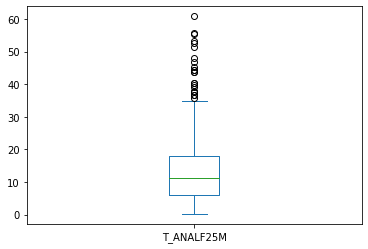

-----
Troc. Média        Troc. Mediana
13.012688524590164           13.010775109170307
11.265                  11.26


PIND
7.55270718232044
5.78
AxesSubplot(0.125,0.125;0.775x0.755)


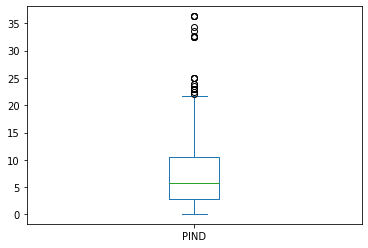

-----
Troc. Média        Troc. Mediana
7.552707182320442           7.531419213973799
5.78                  5.78


PINDCRI
11.675704697986578
9.76
AxesSubplot(0.125,0.125;0.775x0.755)


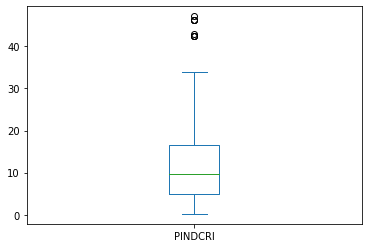

-----
Troc. Média        Troc. Mediana
11.675704697986577           11.629694323144106
10.01                  9.76


PMPOB
20.904830601092893
17.96
AxesSubplot(0.125,0.125;0.775x0.755)


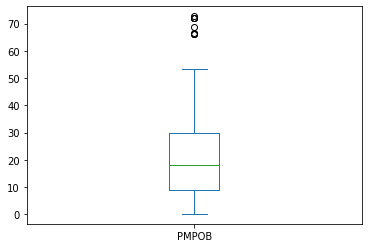

-----
Troc. Média        Troc. Mediana
20.904830601092897           20.901615720524017
17.96                  17.96


PMPOBCRI
30.084675467546756
28.31
AxesSubplot(0.125,0.125;0.775x0.755)


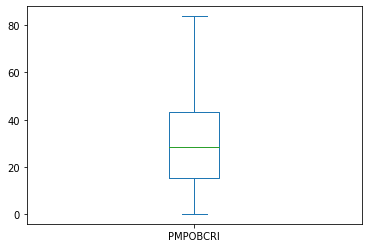

-----
Troc. Média        Troc. Mediana
30.084675467546752           30.071113537117903
28.71                  28.31


PPOBCRI
55.02178728070176
59.02
AxesSubplot(0.125,0.125;0.775x0.755)


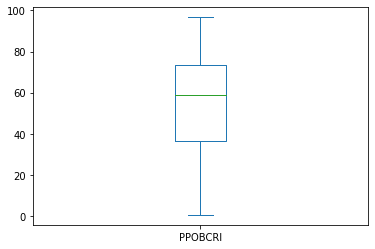

-----
Troc. Média        Troc. Mediana
55.02178728070175           55.03924672489082
59.02                  59.02


T_AGUA
95.74566120218579
98.81
AxesSubplot(0.125,0.125;0.775x0.755)


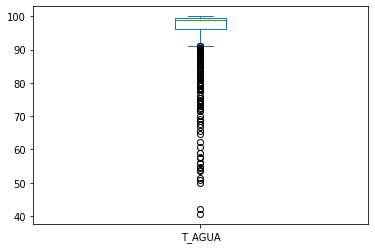

-----
Troc. Média        Troc. Mediana
95.74566120218579           95.74900655021834
98.81                  98.81




In [ ]:
data_mean = data.copy();
data_median = data.copy();

for column in columns_with_nan:
  print(column)
  print(data[column].mean())
  print(data[column].median())
  print(data[column].plot.box())
  plt.show()
  #Inserindo a média e mediana nos valores faltantes
  data_mean[column].fillna(data_mean[column].mean(), inplace=True)
  data_median[column].fillna(data_median[column].median(), inplace=True)
  print('-----')
  #Verificando nova média e mediana
  print("Troc. Média","      ","Troc. Mediana")
  print(data_mean[column].mean(),"         ", data_median[column].mean())
  print(data_mean[column].median(),"                ", data_median[column].median())
  print('\n')


Dadas essas informações, mesmo considerando que em casos com muitos outliers seria mais interessante considerarmos a mediana no lugar da média, podemos perceber que a menor variação e aproximação entre média e mediana se dá: \
  
*   T_ANALF25M - Trocando pela mediana
*   PIND - Trocando pela mediana
*   PINDCRI - Trocando pela mediana
*   PMPOB - Trocando pela média
*   PMPOBCRI - Trocando pela mediana
*   PPOBCRI - Trocando pela média
*   T_AGUA - Trocando pela média

A quantidade das mudanças também interferiu muito nessas escolhas.
  



In [ ]:
data['T_ANALF25M'].fillna(data['T_ANALF25M'].median(), inplace=True)
data['PIND'].fillna(data['PIND'].median(), inplace=True)
data['PINDCRI'].fillna(data['PINDCRI'].median(), inplace=True)
data['PMPOB'].fillna(data['PMPOB'].mean(), inplace=True)
data['PMPOBCRI'].fillna(data['PMPOBCRI'].median(), inplace=True)
data['PPOBCRI'].fillna(data['PPOBCRI'].mean(), inplace=True)
data['T_AGUA'].fillna(data['T_AGUA'].mean(), inplace=True)

Verificando a quantidade dos novos valores NAN e Nulos:

In [ ]:
data.isna().sum()

NOME_UDH             0
CODMUN6              0
NOME_MUN             0
ANO                  0
ESPVIDA              0
FECTOT               0
MORT1                0
MORT5                0
SOBRE40              0
SOBRE60              0
RAZDEP               0
T_ENV                0
E_ANOSESTUDO         0
T_ANALF11A14         0
T_ANALF15A17         0
T_ANALF15M           0
T_ANALF18A24         0
T_ANALF18M           0
T_ANALF25A29         0
T_ANALF25M           0
T_ATRASO_2_BASICO    0
T_ATRASO_2_FUND      0
T_FBBAS              0
T_FBFUND             0
T_FBMED              0
T_FBSUPER            0
T_FLBAS              0
T_FLFUND             0
T_FLMED              0
T_FLSUPER            0
T_FREQ0A5            0
T_FREQ15A17          0
T_FREQ18A24          0
T_FREQ25A29          0
T_FREQ5A6            0
T_FREQ6A14           0
T_FREQ6A17           0
T_FREQFUND1517       0
T_FREQFUND1824       0
T_FREQMED1824        0
T_FUND11A13          0
T_FUND15A17          0
T_FUND18A24          0
T_FUND18M  

Podemos agora mudar os tipos daquelas colunas que gostaríamos de alterar para `int`, considerando é claro quais delas sobraram.

In [ ]:
data['PEA1014'] = data['PEA1014'].astype('int')
data['PEA1517'] = data['PEA1517'].astype('int')
data['PEA18M'] = data['PEA18M'].astype('int')
data['POP'] = data['POP'].astype('int')

Verificando os novos tipos das colunas

In [ ]:
data.dtypes

NOME_UDH             category
CODMUN6              category
NOME_MUN             category
ANO                  category
ESPVIDA               float64
FECTOT                float64
MORT1                 float64
MORT5                 float64
SOBRE40               float64
SOBRE60               float64
RAZDEP                float64
T_ENV                 float64
E_ANOSESTUDO          float64
T_ANALF11A14          float64
T_ANALF15A17          float64
T_ANALF15M            float64
T_ANALF18A24          float64
T_ANALF18M            float64
T_ANALF25A29          float64
T_ANALF25M            float64
T_ATRASO_2_BASICO     float64
T_ATRASO_2_FUND       float64
T_FBBAS               float64
T_FBFUND              float64
T_FBMED               float64
T_FBSUPER             float64
T_FLBAS               float64
T_FLFUND              float64
T_FLMED               float64
T_FLSUPER             float64
T_FREQ0A5             float64
T_FREQ15A17           float64
T_FREQ18A24           float64
T_FREQ25A2

In [ ]:
len(data.columns)

138

In [ ]:
len(data)

916

Verificando se há duplicações

In [ ]:
data[data.duplicated()]

,NOME_UDH,CODMUN6,NOME_MUN,ANO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FBBAS,T_FBFUND,T_FBMED,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ0A5,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ5A6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQMED1824,T_FUND11A13,T_FUND15A17,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,THEIL,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_SERV,P_SIUP,P_TRANSF,CPR,EMP,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA1014,PEA1517,PEA18M,PESORUR,PESOTOT,PESOURB,POP,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R


## Normalização

Vamos verificar as distâncias antes e depois da normalização min-max.

In [ ]:
df_num = data.select_dtypes(include=[np.number]).columns
data_num = pd.DataFrame(data, columns=df_num.values)
dist = np.linalg.norm(data_num.values[1]-data_num.values[2])
print(dist)
data_norm = (data_num - data_num.min()) / (data_num.max() - data_num.min())
dist = np.linalg.norm(data_norm.values[1]-data_norm.values[2])
print(dist)


5698.509528762411
0.9748587762909099


Houve uma boa diminuição. Por serem muitas colunas, e por as informações nas colunas serem importantes, não vamos alterar o dataset original. Vamos apenas guardar a variável `data_norm` para possíveis usos futuros.

## Discretização

O melhor valor para discretização é o IDHM.

In [ ]:
pd.cut(data["IDHM"], 5).value_counts()
names = ["Muito Baixo", "Baixo", "Médio", "Alto", "Muito Alto"]
data["ESCALA_IDHM"] = pd.qcut(data["IDHM"], q=5, labels=names)
data.head()

,NOME_UDH,CODMUN6,NOME_MUN,ANO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FBBAS,T_FBFUND,T_FBMED,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ0A5,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ5A6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQMED1824,T_FUND11A13,T_FUND15A17,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,THEIL,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_SERV,P_SIUP,P_TRANSF,CPR,EMP,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA1014,PEA1517,PEA18M,PESORUR,PESOTOT,PESOURB,POP,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,ESCALA_IDHM
0,Centro / Alto da Bela Vista / Timbó : BR 101,260005.0,Abreu E Lima (PE),2000.0,68.90,1.95,39.5,50.04,88.96,75.03,47.56,7.18,9.56,3.12,2.30,12.08,4.30,12.88,4.65,15.02,27.47,18.83,118.00,127.19,93.01,5.71,89.04,91.23,33.74,1.96,38.06,87.88,36.77,9.71,85.49,93.61,92.07,46.74,12.50,18.72,72.50,40.83,58.59,45.08,41.49,22.16,26.94,23.60,22.72,2.07,117.13,183.50,292.81,460.69,694.67,0.48,8.88,13.32,24.22,34.20,54.43,67.53,36.65,4.04,53.35,12.88,26.16,46.65,73.94,11.38,8.28,347.30,0.41,2.02,17.26,5.13,0.0,50.76,0.71,20.70,21.58,1.90,98.99,91.95,36.73,89.81,100.00,4.94,0.00,198,191,229,207,205,197,174,146,102,85,68,183,66,49,41,26,20,2185,194,210,227,242,228,216,194,165,123,104,86,185,77,73,51,31,42,2446,19,49,1935,0,4631,4631,4627,0.451,0.552,0.612,0.516,0.732,0.606,Baixo
1,Desterro / Matinha / Fosfato : Vila da Caixa /...,260005.0,Abreu E Lima (PE),2000.0,68.90,1.95,39.5,50.04,88.96,75.03,48.59,5.68,9.56,4.70,2.21,11.63,3.55,12.40,4.27,14.75,27.47,18.83,118.00,127.19,93.01,5.71,89.04,91.23,33.74,1.96,38.06,87.88,36.77,9.71,85.49,93.61,92.07,46.74,12.50,18.72,72.50,40.83,58.59,45.08,41.49,22.16,26.94,23.60,22.72,2.07,117.13,183.50,292.81,460.69,694.67,0.48,8.88,13.32,24.22,34.20,54.43,67.53,36.65,4.04,53.35,12.88,26.16,46.65,73.94,11.38,8.28,347.30,0.41,2.02,17.26,5.13,0.0,50.76,0.71,20.70,21.58,1.90,98.75,91.95,36.73,89.81,100.00,4.94,0.00,357,387,337,391,379,337,302,215,169,145,117,349,95,65,54,35,37,3767,349,353,384,430,394,373,328,237,208,180,144,321,112,86,79,43,49,4065,35,81,3188,0,7832,7832,7790,0.451,0.552,0.612,0.516,0.732,0.606,Baixo
2,Centro / Timbó / Alto São Miguel / Jardim Caet...,260005.0,Abreu E Lima (PE),2000.0,67.31,2.18,44.8,56.69,87.60,72.48,49.15,6.52,9.21,4.38,3.02,13.06,3.28,13.93,5.71,16.62,32.00,23.46,117.85,134.76,75.97,0.99,89.01,94.96,24.32,0.19,38.69,75.70,34.93,6.28,94.15,98.02,91.60,48.75,11.70,19.97,64.83,29.77,54.94,38.99,34.70,13.66,22.61,18.12,16.91,1.24,87.84,156.17,234.25,342.59,517.30,0.44,11.94,17.65,33.54,44.74,64.74,73.32,32.68,4.49,48.69,14.34,29.18,51.31,70.27,9.12,6.79,256.49,0.33,2.10,17.72,9.35,0.0,41.38,0.63,23.97,25.47,1.33,99.23,87.73,40.17,94.18,100.00,6.74,0.00,515,445,506,529,484,475,393,324,224,209,146,461,131,104,80,43,48,5113,463,526,533,540,533,520,407,365,283,264,185,444,192,138,120,87,86,5683,22,151,4235,0,10795,10795,10788,0.390,0.506,0.567,0.464,0.705,0.557,Muito Baixo
3,Planalto : Rua Almirante Tamandaré,260005.0,Abreu E Lima (PE),2000.0,67.31,2.18,44.8,56.69,87.60,72.48,70.14,6.85,9.21,2.60,5.08,18.83,2.29,20.24,4.88,25.57,32.00,23.46,117.85,134.76,75.97,0.99,89.01,94.96,24.32,0.19,38.69,75.70,34.93,6.28,94.15,98.02,91.60,48.75,11.70,19.97,64.83,29.77,54.94,38.99,34.70,13.66,22.61,18.12,16.91,1.24,87.84,156.17,234.2

In [ ]:
data["ESCALA_IDHM"] = data["ESCALA_IDHM"].astype("category")

## Procura por Outliers

Vamos agora procurar por outliers nas colunas. Vale salientar antes de tudo que o dataset tem muitas colunas, portanto verificamos nas mais relevantes. Outro fator importante é que, em sua maioria, por se tratar de um dataset de IDHM, determinadas variáveis apresentam muitos outliers. Contudo, não podemos remover tais outliers, pois não representam de fato dados errados. Afinal de contas, a RMR é a região metropolitana [mais desigual do Brasil](https://projetocolabora.com.br/especial/recife-a-capital-mais-desigual-do-brasil/). 

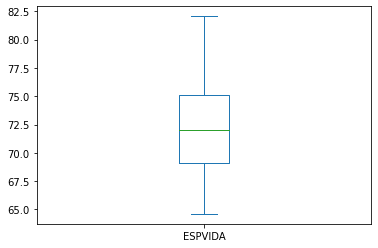

In [ ]:
data['ESPVIDA'].plot.box()

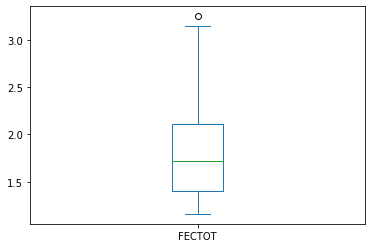

In [ ]:
data['FECTOT'].plot.box()

Esta taxa de fecundidade é possível, considerando também que os outliers aqui não ultrapassam demais a margem dos valores.

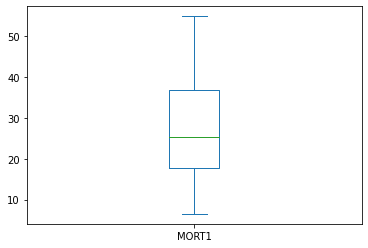

In [ ]:
data['MORT1'].plot.box()

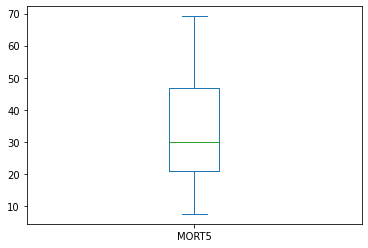

In [ ]:
data['MORT5'].plot.box()

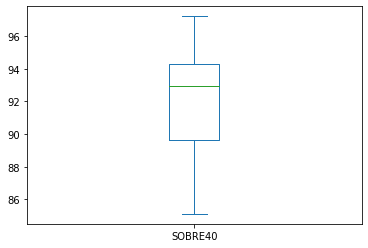

In [ ]:
data['SOBRE40'].plot.box()

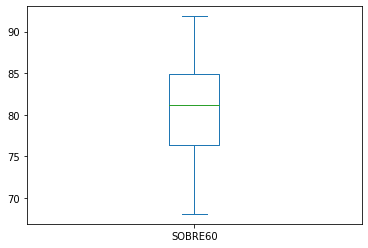

In [ ]:
data['SOBRE60'].plot.box()

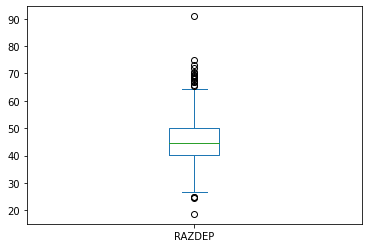

In [ ]:
data['RAZDEP'].plot.box()

A RAZDEP representa uma proporção de dependência entre indivíduos nas faixas da adolescência e da terceira idade em relação a indivíduos na vida adulta padrão. É interessante perceber se a distribuição tem certa semelhança com as distribuições das colunas de quantidade de pessoas nas faixas de menos que 14 e mais de 65 anos:

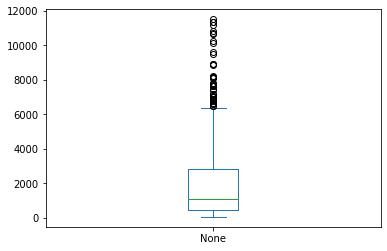

In [ ]:
sum1 = data['HOMEM0A4'] + data['HOMEM5A9'] + data['HOMEM10A14'] + data['MULH0A4'] + data['MULH5A9'] + data['MULH10A14']
sum1.plot.box()

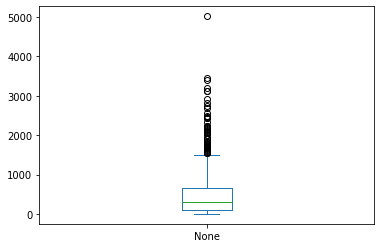

In [ ]:
sum2 = data['HOMEM65A69'] + data['HOMEM70A74'] + data['HOMEM75A79'] + data['HOMENS80'] + data['MULH65A69'] + data['MULH70A74'] + data['MULH75A79'] + data['MULHER80']
sum2.plot.box()

Também há outliers nesses casos, com uma distribuição semelhante, fazendo-nos entender que há bairros com bem mais população dependente que outros. \
Vamos rodar o z-score nessa variável:

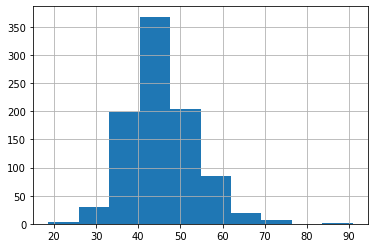

In [ ]:
data['RAZDEP'].hist()

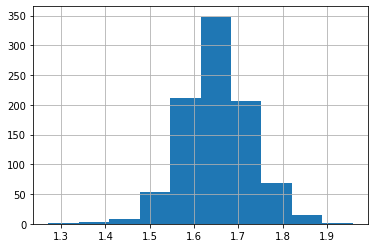

In [ ]:
from numpy import log10
data['RAZDEP_LOG'] = log10(data['RAZDEP'])
data['RAZDEP_LOG'].hist()

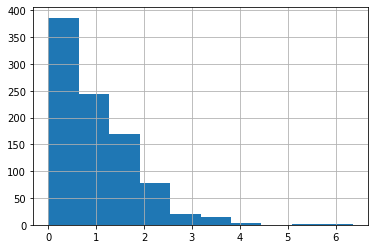

In [ ]:
(abs(data['RAZDEP_LOG']-data['RAZDEP_LOG'].median())/data['RAZDEP_LOG'].mad()).hist()

In [ ]:
data[abs(data['RAZDEP_LOG']-data['RAZDEP_LOG'].median())/data['RAZDEP_LOG'].mad() > 3.5]

,NOME_UDH,CODMUN6,NOME_MUN,ANO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FBBAS,T_FBFUND,T_FBMED,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ0A5,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ5A6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQMED1824,T_FUND11A13,T_FUND15A17,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,THEIL,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_SERV,P_SIUP,P_TRANSF,CPR,EMP,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA1014,PEA1517,PEA18M,PESORUR,PESOTOT,PESOURB,POP,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,ESCALA_IDHM,RAZDEP_LOG
33,Juçaral,260290.0,Cabo de Santo Agostinho (PE),2000.0,64.71,3.15,54.40,68.65,85.21,68.23,75.02,5.24,6.26,13.69,18.64,42.30,25.91,45.68,38.13,52.80,52.70,43.31,95.73,121.81,24.53,0.00,79.98,85.97,9.66,0.00,17.44,64.43,20.88,7.47,69.13,89.00,82.42,54.00,12.02,6.32,26.95,11.10,18.33,10.61,7.82,3.97,5.76,4.44,3.97,0.53,49.13,73.69,102.48,156.82,208.22,0.50,36.30,46.27,72.15,82.20,92.25,96.72,40.77,3.87,54.29,13.09,26.18,45.71,68.44,12.46,8.30,133.12,0.41,51.12,8.22,3.82,0.00,21.84,0.56,10.27,17.90,0.47,82.41,22.25,60.75,72.17,82.32,28.53,17.68,129,159,154,116,81,59,74,53,36,34,28,145,24,23,23,7,6,1151,130,140,130,105,79,76,58,54,37,33,34,151,32,24,19,9,8,1119,7,28,639,0,2270,2270,2263,0.106,0.278,0.392,0.202,0.662,0.452,Muito Baixo,1.875177
214,Rio Doce ( Bica ),260960.0,Olinda (PE),2000.0,66.49,2.38,47.70,60.32,86.87,71.15,73.05,3.39,8.46,1.82,3.13,12.55,6.67,13.81,10.00,15.46,38.13,27.39,113.15,131.66,58.76,3.82,87.01,91.10,16.58,2.22,31.80,78.81,31.63,8.79,78.41,92.62,89.11,58.41,12.67,14.07,48.62,22.39,41.16,29.59,25.90,12.57,17.33,14.90,14.13,2.14,81.66,131.63,195.21,302.82,468.50,0.47,14.81,21.73,42.59,57.66,72.90,84.86,35.39,4.20,51.58,13.40,27.21,48.42,73.24,10.56,7.70,230.61,0.35,2.13,14.21,9.12,0.00,62.21,0.55,9.40,21.12,0.74,99.55,66.11,55.56,79.13,100.00,18.74,0.00,20,33,18,18,8,15,21,10,8,4,4,33,1,1,1,2,0,197,22,38,24,17,12,29,26,15,9,6,8,26,3,1,2,2,6,246,5,13,159,0,443,443,443,0.296,0.405,0.515,0.365,0.692,0.540,Muito Baixo,1.863620
367,Pina : Zeis Ilha de Deus,261160.0,Recife (PE),2000.0,65.53,2.78,51.30,64.74,85.98,69.57,90.91,1.84,7.84,40.00,30.99,43.51,34.46,45.58,38.46,51.42,46.76,36.82,108.93,133.01,40.88,1.08,86.52,91.58,7.80,0.34,34.64,74.72,24.98,12.16,81.38,92.64,87.96,62.36,14.52,8.75,35.86,9.27,30.81,24.38,22.19,6.93,10.76,8.76,8.07,0.12,65.07,98.26,161.54,260.28,344.87,0.42,21.21,30.67,51.14,67.02,79.35,90.91,29.97,4.85,47.08,14.51,29.62,52.92,64.58,8.26,6.49,176.25,0.31,2.19,13.73,10.04,0.00,63.26,0.69,7.82,23.79,0.26,84.63,67.80,61.38,92.70,100.00,9.39,0.00,73,66,53,55,25,27,21,21,13,5,9,73,6,2,2,0,1,452,67,75,57,54,40,28,22,12,14,11,7,69,4,5,2,3,2,472,16,28,257,0,924,924,924,0.244,0.334,0.466,0.301,0.676,0.497,Muito Baixo,1.958612
449,Matriz da Luz,261370.0,São Lourenço da Mata (PE),2000.0,64.81,3.15,54.10,68.18,85.30,68.38,71.89,5.36,6.01,33.57,25.99,48.16,26.35,51.86,41.00,60.85,51.96,41.75,102.48,128.07,25.08,0.25,82.00,86.87,5.41,0.00,28.24,70.24,28.27,11.25,85.00,87.40,83.13,61.41,17.46,7.07,26.25,6.69,21.49,13.75,10.95,6.03,7.16,5.65,5.10,0.86,48.80,78.08,117.91,196.51,294.77,0.49,32.54,42.45,66.19,77.42,86.67,93.13,35.82,3.09,52.65,12.09,25.94,47.35,65.40,11.85,8.71,143.45,0.36,21.51,15.01,12.51,0.00,41.25,0.46,7.95,18.34,0.46

Os bairros com os outliers menores em sua maioria são bairros universitários ou de unidades prisionais (onde a maioria das pessoas tende a ser jovem-adulto), portanto fazem sentido.
No caso da Ilha de Deus, o outlier exagerado pode ser devido ao fato de que foi criado um enorme conjunto habitacional lá nos anos 2000, ano da medição, que modificou completamente a estrutura do bairro.
Vamos manter os outliers.

Vamos continuar com os outros plots:

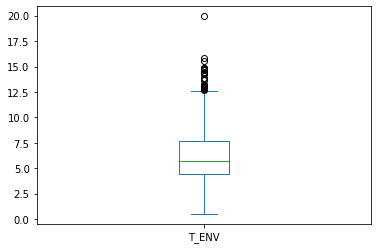

In [ ]:
data['T_ENV'].plot.box()

Esse caso se assemelha aos de cima, considerando que essa coluna T_ENV representa a taxa de envelhecimento. Isso já implica que há certa concentração de pessoas mais velhas em alguns bairros.

In [ ]:
data['T_ENV_LOG'] = log10(data['T_ENV'])
data[abs(data['T_ENV_LOG']-data['T_ENV_LOG'].median())/data['T_ENV_LOG'].mad() > 3.5]

,NOME_UDH,CODMUN6,NOME_MUN,ANO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FBBAS,T_FBFUND,T_FBMED,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ0A5,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ5A6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQMED1824,T_FUND11A13,T_FUND15A17,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,THEIL,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_SERV,P_SIUP,P_TRANSF,CPR,EMP,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA1014,PEA1517,PEA18M,PESORUR,PESOTOT,PESOURB,POP,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,ESCALA_IDHM,RAZDEP_LOG,T_ENV_LOG
238,Jaguaribe : Alameda Paulista / Estrada de Jagu...,261070.0,Paulista (PE),2000.0,70.29,2.04,35.2,44.61,90.09,77.22,53.15,1.58,10.55,2.55,0.00,2.44,1.42,2.61,1.65,2.85,24.74,15.85,128.60,133.29,117.17,8.04,94.63,95.57,47.92,3.47,49.95,97.37,37.76,11.61,94.92,98.26,98.00,41.66,7.08,22.81,69.58,51.69,75.57,55.18,50.12,34.75,39.65,34.01,32.61,4.15,150.31,244.01,345.95,560.25,846.56,0.47,4.57,4.91,15.68,19.34,41.59,49.41,36.40,4.64,52.20,13.85,27.60,47.80,69.57,10.51,7.54,434.81,0.38,0.62,18.95,5.22,0.00,55.33,0.56,17.54,17.27,2.76,67.65,96.39,32.95,91.94,100.00,0.78,0.00,60,50,32,31,54,67,58,33,18,14,6,62,3,4,2,1,1,492,61,48,40,49,67,79,47,27,19,9,7,55,6,5,3,2,0,520,4,13,386,0,1012,1012,932,0.552,0.627,0.663,0.601,0.755,0.642,Médio,1.725503,0.198657
340,San Martin ( Boa Idéia ),261160.0,Recife (PE),2000.0,66.88,2.35,46.4,58.58,87.22,71.78,60.80,1.06,7.73,12.57,8.84,15.62,8.33,16.57,17.86,18.87,38.05,28.91,114.78,132.78,58.85,3.05,89.37,93.05,21.30,1.42,42.93,80.81,30.71,9.80,90.20,93.74,90.59,56.20,16.45,11.54,44.80,25.33,34.85,29.34,27.63,13.44,15.57,14.84,14.62,1.35,74.57,122.01,176.86,294.77,455.49,0.50,14.87,20.55,46.84,61.53,74.82,85.28,40.61,4.29,55.68,12.72,25.13,44.32,75.42,12.77,8.76,237.80,0.43,0.34,18.35,8.82,0.12,59.42,0.72,11.72,28.87,0.29,80.01,57.50,48.57,96.65,99.79,20.61,0.21,118,118,120,71,85,78,82,52,22,21,15,110,8,4,2,1,1,908,111,118,105,79,83,96,102,56,39,28,20,117,9,3,4,1,4,975,12,50,675,0,1883,1883,1881,0.293,0.434,0.525,0.381,0.698,0.545,Muito Baixo,1.783904,0.025306
387,Ibura : Residencial Vale dos Rios,261160.0,Recife (PE),2000.0,73.82,1.64,25.4,32.34,92.70,82.56,46.94,1.24,9.95,0.97,3.45,0.53,0.54,0.41,0.00,0.39,21.04,15.24,109.74,115.89,92.59,31.97,88.06,91.07,42.02,15.85,39.69,86.59,42.73,16.72,91.80,96.49,93.88,36.11,8.49,14.30,68.91,53.27,75.77,64.20,61.31,37.89,49.49,46.63,45.92,15.67,160.63,302.57,543.33,1035.39,1438.04,0.53,5.78,9.55,16.59,26.36,34.66,46.36,38.87,2.97,56.39,9.51,21.78,43.61,73.93,16.35,11.86,683.86,0.53,1.88,16.63,4.65,0.00,67.73,0.71,7.84,22.61,2.09,100.00,94.88,28.50,97.58,100.00,0.95,0.00,152,72,44,43,107,167,150,100,37,32,4,127,11,5,4,1,3,1059,132,73,56,100,188,159,140,75,25,20,15,114,12,6,4,2,2,1123,3,14,967,0,2182,2182,2182,0.642,0.630,0.717,0.634,0.814,0.715,Alto,1.671543,0.093422
388,Ibura : Residencial Primavera,261160.0,Recife (PE),2000.0,72.30,1.76,29.4,37.39,91.62,80.29,47.96,0.49,9.03,2.17,5.71,1.88,0.95,1.68,0.75,1.81,33.81,26.07,112.95,130.83,71.60,12.69,88.58,94.12,30.13,6.16,39.93,77.94,33.77,12.89,91.26,95.18,89.98,44.50,10.20,12.97,60.48,35.58,54.26,50.16,48.92,16.29,27.99,31.95,33.15,10.05,107.36,190.82,331.37,681.93,1301.39,0.60,9.21,16.53,28.67,43.57,50.68,66.06,47.84,2.47,65.11,7

Também vamos manter os outliers nesses casos, por se tratarem de valores possíveis de taxas.

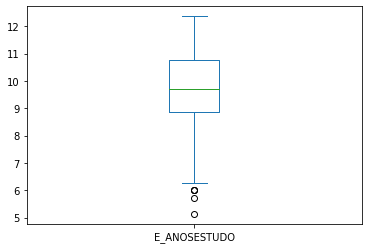

In [ ]:
data['E_ANOSESTUDO'].plot.box()

Essa coluna representa a expectativa de quantos anos escolares pessoas de até 18 anos devem ter completado, em média.

In [ ]:
data['E_ANOSESTUDO_LOG'] = log10(data['E_ANOSESTUDO'])
data[abs(data['E_ANOSESTUDO_LOG']-data['E_ANOSESTUDO_LOG'].median())/data['E_ANOSESTUDO_LOG'].mad() > 3.5]

,NOME_UDH,CODMUN6,NOME_MUN,ANO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FBBAS,T_FBFUND,T_FBMED,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ0A5,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ5A6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQMED1824,T_FUND11A13,T_FUND15A17,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,THEIL,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_SERV,P_SIUP,P_TRANSF,CPR,EMP,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA1014,PEA1517,PEA18M,PESORUR,PESOTOT,PESOURB,POP,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,ESCALA_IDHM,RAZDEP_LOG,T_ENV_LOG,E_ANOSESTUDO_LOG
33,Juçaral,260290.0,Cabo de Santo Agostinho (PE),2000.0,64.71,3.15,54.4,68.65,85.21,68.23,75.02,5.24,6.26,13.69,18.64,42.30,25.91,45.68,38.13,52.80,52.70,43.31,95.73,121.81,24.53,0.00,79.98,85.97,9.66,0.00,17.44,64.43,20.88,7.47,69.13,89.00,82.42,54.00,12.02,6.32,26.95,11.10,18.33,10.61,7.82,3.97,5.76,4.44,3.97,0.53,49.13,73.69,102.48,156.82,208.22,0.50,36.30,46.27,72.15,82.20,92.25,96.72,40.77,3.87,54.29,13.09,26.18,45.71,68.44,12.46,8.30,133.12,0.41,51.12,8.22,3.82,0.00,21.84,0.56,10.27,17.90,0.47,82.41,22.25,60.75,72.17,82.32,28.53,17.68,129,159,154,116,81,59,74,53,36,34,28,145,24,23,23,7,6,1151,130,140,130,105,79,76,58,54,37,33,34,151,32,24,19,9,8,1119,7,28,639,0,2270,2270,2263,0.106,0.278,0.392,0.202,0.662,0.452,Muito Baixo,1.875177,0.719331,0.796574
34,Área Rural : Barragens Gurjaú / Pirapama / Bit...,260290.0,Cabo de Santo Agostinho (PE),2000.0,64.71,3.15,54.4,68.65,85.21,68.23,69.60,3.66,6.26,21.28,18.81,41.82,23.78,45.06,32.92,53.35,52.70,43.31,95.73,121.81,24.53,0.00,79.98,85.97,9.66,0.00,17.44,64.43,20.88,7.47,69.13,89.00,82.42,54.00,12.02,6.32,26.95,11.10,18.33,10.61,7.82,3.97,5.76,4.44,3.97,0.53,49.13,73.69,102.48,156.82,208.22,0.50,36.30,46.27,72.15,82.20,92.25,96.72,40.77,3.87,54.29,13.09,26.18,45.71,68.44,12.46,8.30,133.12,0.41,51.12,8.22,3.82,0.00,21.84,0.56,10.27,17.90,0.47,57.38,22.25,60.75,72.17,82.32,28.53,17.68,892,918,980,831,574,462,408,342,266,270,228,901,187,105,89,55,55,7559,953,819,801,690,519,431,376,314,241,207,166,853,128,83,51,40,47,6713,39,174,4042,14271,14271,0,14187,0.106,0.278,0.392,0.202,0.662,0.452,Muito Baixo,1.842609,0.563481,0.796574
35,Distrito Industrial de Suape / Engenho Tiriri,260290.0,Cabo de Santo Agostinho (PE),2000.0,64.71,3.15,54.4,68.65,85.21,68.23,55.82,4.19,6.26,10.81,9.18,23.34,11.08,24.96,18.79,29.74,52.70,43.31,95.73,121.81,24.53,0.00,79.98,85.97,9.66,0.00,17.44,64.43,20.88,7.47,69.13,89.00,82.42,54.00,12.02,6.32,26.95,11.10,18.33,10.61,7.82,3.97,5.76,4.44,3.97,0.53,49.13,73.69,102.48,156.82,208.22,0.50,36.30,46.27,72.15,82.20,92.25,96.72,40.77,3.87,54.29,13.09,26.18,45.71,68.44,12.46,8.30,133.12,0.41,51.12,8.22,3.82,0.00,21.84,0.56,10.27,17.90,0.47,96.20,22.25,60.75,72.17,82.32,28.53,17.68,94,101,103,96,74,52,60,44,34,34,25,85,27,15,10,3,5,861,97,81,97,87,81,60,56,45,41,29,21,75,16,15,8,9,6,823,4,19,533,517,1683,1167,1633,0.106,0.278,0.392,0.202,0.662,0.452,Muito Baixo,1.746790,0.622214,0.796574
36,DIPER / DI Santo Estevão,260290.0,Cabo de Santo Agostinho (PE),2000.0,64.71,3.15,54.4,68.65,85.21,68.23,65.46,4.66,6.26,14.67,13.84,28.12,16.95,29.71,21.66,34.04,52.70,43.31,95.73,121.81,24.53,0.00,79.98,85.97,9.66,0.00,17.44,64.43,20.88,7.47,69.13,89.00,82.42,54.00,12.02,6.32,26.95,

Os bairros desses outliers são em sua maioria bem pobres ou bem rurais, portanto é compreensível. 
Continue-mos:

AxesSubplot(0.125,0.125;0.775x0.755)


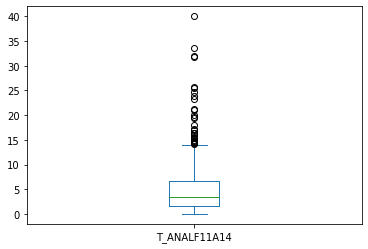

In [ ]:
print(data['T_ANALF11A14'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


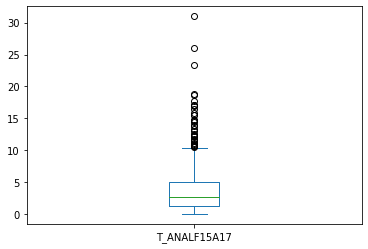

In [ ]:
print(data['T_ANALF15A17'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


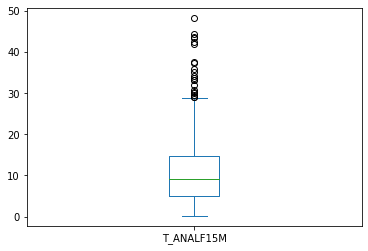

In [ ]:
print(data['T_ANALF15M'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


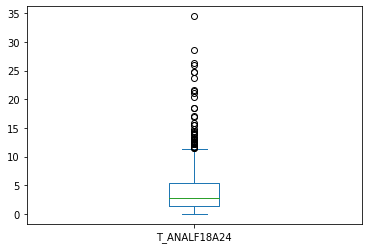

In [ ]:
print(data['T_ANALF18A24'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


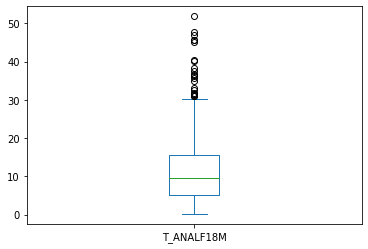

In [ ]:
print(data['T_ANALF18M'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


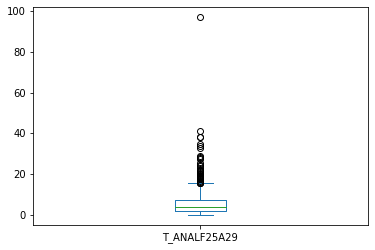

In [ ]:
print(data['T_ANALF25A29'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


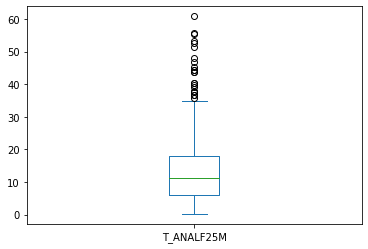

In [ ]:
print(data['T_ANALF25M'].plot.box())

Todos os casos aqui indicam que alguns bairros tem uma taxa bem maior de anafalbetismo que a média. Isso é esperado, considerando a falta de acesso a educação básica pública de qualidade nos bairros mais pobres. Vamos considerar o outlier de T_ANALF25A29:

In [ ]:
data['T_ANALF25A29_LOG'] = data['T_ANALF25A29']
data[abs(data['T_ANALF25A29_LOG']-data['T_ANALF25A29_LOG'].median())/data['T_ANALF25A29_LOG'].mad() > 3.5]

,NOME_UDH,CODMUN6,NOME_MUN,ANO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FBBAS,T_FBFUND,T_FBMED,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ0A5,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ5A6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQMED1824,T_FUND11A13,T_FUND15A17,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,THEIL,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_SERV,P_SIUP,P_TRANSF,CPR,EMP,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA1014,PEA1517,PEA18M,PESORUR,PESOTOT,PESOURB,POP,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,ESCALA_IDHM,RAZDEP_LOG,T_ENV_LOG,E_ANOSESTUDO_LOG,T_ANALF25A29_LOG
12,Área Rural de Aldeia : Chã de Cruz / Agrovila ...,260005.0,Abreu E Lima (PE),2000.0,66.11,2.36,49.10,62.04,86.52,70.53,63.47,3.86,8.20,11.35,10.84,29.16,14.07,31.43,17.78,37.52,34.20,26.09,104.79,122.78,52.89,1.09,84.58,90.29,21.28,0.82,28.24,68.11,24.10,6.72,72.51,91.64,85.58,45.54,11.38,10.42,51.79,25.88,37.22,24.61,20.64,13.69,17.41,11.74,9.95,0.78,68.32,122.49,182.20,294.11,404.25,0.46,20.93,29.29,45.32,58.24,75.77,84.71,33.45,3.64,50.06,12.91,27.60,49.94,70.63,10.36,7.76,204.79,0.34,10.94,16.63,9.13,0.00,39.92,0.87,17.60,24.12,1.23,75.600000,62.90,46.52,74.41,99.63,25.31,0.37,325,368,360,298,244,226,193,157,89,82,59,308,73,51,35,31,14,2913,347,339,338,263,251,234,180,118,87,81,69,297,69,32,21,23,12,2761,42,95,1927,5674,5674,0,5667,0.246,0.410,0.498,0.346,0.685,0.521,Muito Baixo,1.802568,0.586587,0.913814,17.78
18,Município de Araçoiaba,260105.0,Araçoiaba (PE),2000.0,66.49,3.13,51.32,56.90,87.53,74.00,68.11,4.91,7.03,25.70,15.80,37.50,21.06,40.16,28.31,46.82,45.77,36.99,108.68,130.11,42.04,1.65,83.40,87.44,13.43,0.79,19.01,71.13,32.87,13.70,66.42,87.91,83.82,57.38,21.36,9.91,37.14,14.96,23.98,14.40,11.07,7.23,9.53,6.79,5.84,0.56,43.38,80.43,122.49,196.51,292.81,0.53,33.58,47.17,66.56,80.42,88.27,94.88,41.18,2.02,56.22,10.29,23.37,43.78,70.84,16.00,10.92,152.31,0.43,19.83,8.52,6.47,0.00,39.71,0.26,13.39,19.65,1.08,79.110000,31.90,52.77,65.61,96.65,49.31,3.35,861,924,919,791,575,526,474,356,263,235,185,902,180,120,109,72,76,7568,844,958,855,739,587,567,481,359,286,226,203,890,180,131,103,62,69,7540,99,400,4581,2661,15108,12447,15072,0.144,0.314,0.429,0.242,0.692,0.473,Muito Baixo,1.833211,0.691081,0.846955,28.31
31,Charneca / Charnequinha : Loteamento Granjas M...,260290.0,Cabo de Santo Agostinho (PE),2000.0,65.30,2.56,52.20,65.84,85.77,69.19,61.16,4.04,7.77,14.01,10.32,26.33,12.30,28.35,18.42,34.13,43.66,33.94,110.68,134.26,48.63,1.48,85.22,90.75,15.57,1.08,29.01,73.51,31.91,6.67,77.52,91.10,86.25,55.08,15.01,13.71,38.86,21.31,40.85,25.57,19.97,5.67,14.72,12.31,11.42,0.49,58.95,112.73,156.17,248.89,334.87,0.45,22.35,30.44,51.90,62.92,80.72,87.35,33.69,3.90,49.67,13.51,28.35,50.33,66.00,9.97,7.35,182.62,0.36,1.95,15.58,12.48,0.26,47.08,0.48,17.94,21.80,0.26,95.300000,77.11,52.68,92.69,99.87,12.19,0.13,940,982,1008,877,696,567,487,391,311,241,203,928,167,104,95,57,66,8121,916,907,1016,863,731,651,558,436,321,272,213,889,167,121,92,65,62,8278,100,368,5988,0,16398,16398,16375,0.256,0.358,0.476,0.320,0.672,0.503,Muito Baixo,1.786467,0.606381,0.890421,18.42
33,Juçaral,260290.0,Cabo de Santo Agostinho (PE),2000.0,64.71,3.15,54.40,68.65,85.21,68.23,75.02,5.24,6.26,13.69,18.64,42.30,25.91,45.68,38.13,52.80,52.70,43.31,95

O outlier mais absurdo é o bairro de Pixete, em São Lourenço da Mata. Este valor de fato está um pouco estranho considerando as taxas de analfabetismo das outras faixas etárias. Vamos remover esse caso, removendo também sua correspondencia no ano de 2010.

In [ ]:
index_2010 = data.index[(data['NOME_UDH'] == 'Pixete') & (data['ANO'] == 2010)];
indexes_to_remove = [459] + index_2010.tolist()
data.drop(indexes_to_remove, axis=0, inplace=True)

Continuando...

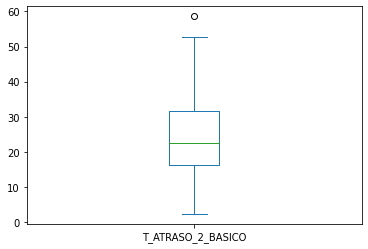

In [ ]:
data['T_ATRASO_2_BASICO'].plot.box()

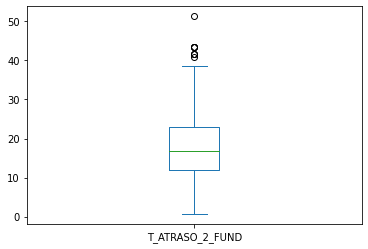

In [ ]:
data['T_ATRASO_2_FUND'].plot.box()

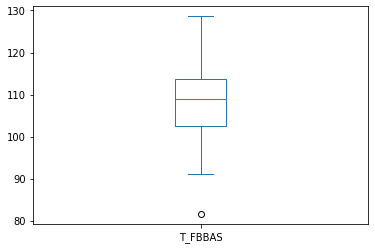

In [ ]:
data['T_FBBAS'].plot.box()

Outliers compreensíveis pela mesma questão da ruralidade e pobreza dos bairros.

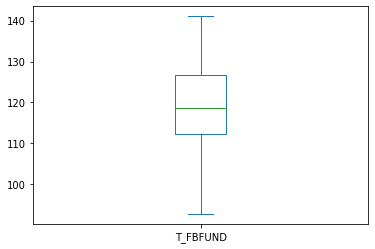

In [ ]:
data['T_FBFUND'].plot.box()

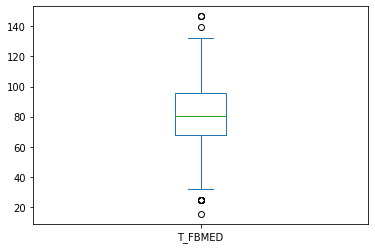

In [ ]:
data['T_FBMED'].plot.box()

In [ ]:
data['T_FBMED_LOG'] = log10(data['T_FBMED'])
data[abs(data['T_FBMED_LOG']-data['T_FBMED_LOG'].median())/data['T_FBMED_LOG'].mad() > 2.5]

,NOME_UDH,CODMUN6,NOME_MUN,ANO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FBBAS,T_FBFUND,T_FBMED,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ0A5,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ5A6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQMED1824,T_FUND11A13,T_FUND15A17,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,THEIL,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_SERV,P_SIUP,P_TRANSF,CPR,EMP,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA1014,PEA1517,PEA18M,PESORUR,PESOTOT,PESOURB,POP,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,ESCALA_IDHM,RAZDEP_LOG,T_ENV_LOG,E_ANOSESTUDO_LOG,T_ANALF25A29_LOG,T_FBMED_LOG
18,Município de Araçoiaba,260105.0,Araçoiaba (PE),2000.0,66.49,3.13,51.32,56.90,87.53,74.00,68.11,4.91,7.03,25.70,15.80,37.50,21.06,40.16,28.31,46.82,45.77,36.99,108.68,130.11,42.04,1.65,83.40,87.44,13.43,0.79,19.01,71.13,32.87,13.70,66.42,87.91,83.82,57.38,21.36,9.91,37.14,14.96,23.98,14.40,11.07,7.23,9.53,6.79,5.84,0.56,43.38,80.43,122.49,196.51,292.81,0.53,33.58,47.17,66.56,80.42,88.27,94.880000,41.18,2.02,56.22,10.29,23.37,43.78,70.84,16.00,10.92,152.31,0.43,19.83,8.52,6.47,0.00,39.71,0.26,13.39,19.65,1.08,79.11,31.90,52.77,65.61,96.65,49.31,3.35,861,924,919,791,575,526,474,356,263,235,185,902,180,120,109,72,76,7568,844,958,855,739,587,567,481,359,286,226,203,890,180,131,103,62,69,7540,99,400,4581,2661,15108,12447,15072,0.144,0.314,0.429,0.242,0.692,0.473,Muito Baixo,1.833211,0.691081,0.846955,28.31,1.623663
33,Juçaral,260290.0,Cabo de Santo Agostinho (PE),2000.0,64.71,3.15,54.40,68.65,85.21,68.23,75.02,5.24,6.26,13.69,18.64,42.30,25.91,45.68,38.13,52.80,52.70,43.31,95.73,121.81,24.53,0.00,79.98,85.97,9.66,0.00,17.44,64.43,20.88,7.47,69.13,89.00,82.42,54.00,12.02,6.32,26.95,11.10,18.33,10.61,7.82,3.97,5.76,4.44,3.97,0.53,49.13,73.69,102.48,156.82,208.22,0.50,36.30,46.27,72.15,82.20,92.25,96.720000,40.77,3.87,54.29,13.09,26.18,45.71,68.44,12.46,8.30,133.12,0.41,51.12,8.22,3.82,0.00,21.84,0.56,10.27,17.90,0.47,82.41,22.25,60.75,72.17,82.32,28.53,17.68,129,159,154,116,81,59,74,53,36,34,28,145,24,23,23,7,6,1151,130,140,130,105,79,76,58,54,37,33,34,151,32,24,19,9,8,1119,7,28,639,0,2270,2270,2263,0.106,0.278,0.392,0.202,0.662,0.452,Muito Baixo,1.875177,0.719331,0.796574,38.13,1.389698
34,Área Rural : Barragens Gurjaú / Pirapama / Bit...,260290.0,Cabo de Santo Agostinho (PE),2000.0,64.71,3.15,54.40,68.65,85.21,68.23,69.60,3.66,6.26,21.28,18.81,41.82,23.78,45.06,32.92,53.35,52.70,43.31,95.73,121.81,24.53,0.00,79.98,85.97,9.66,0.00,17.44,64.43,20.88,7.47,69.13,89.00,82.42,54.00,12.02,6.32,26.95,11.10,18.33,10.61,7.82,3.97,5.76,4.44,3.97,0.53,49.13,73.69,102.48,156.82,208.22,0.50,36.30,46.27,72.15,82.20,92.25,96.720000,40.77,3.87,54.29,13.09,26.18,45.71,68.44,12.46,8.30,133.12,0.41,51.12,8.22,3.82,0.00,21.84,0.56,10.27,17.90,0.47,57.38,22.25,60.75,72.17,82.32,28.53,17.68,892,918,980,831,574,462,408,342,266,270,228,901,187,105,89,55,55,7559,953,819,801,690,519,431,376,314,241,207,166,853,128,83,51,40,47,6713,39,174,4042,14271,14271,0,14187,0.106,0.278,0.392,0.202,0.662,0.452,Muito Baixo,1.842609,0.563481,0.796574,32.92,1.389698
35,Distrito Industrial de Suape / Engenho Tiriri,260290.0,Cabo de Santo Agostinho (PE),2000.0,64.71,3.15,54.40,68.65,85.21,68.23,55.82,4.19,6.26,10.81,9.18,23.34,11.08,24.96,18.79,29.74,52

Interessante notarmos como os outliers bem para cima se encontram em bairros ricos (em sua maioria orlas) e os para baixo nos mais pobres. Compreensível data a estratificação da cidade. Continuemos:

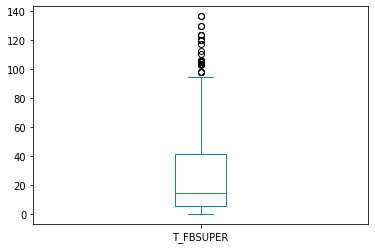

In [ ]:
data['T_FBSUPER'].plot.box()

In [ ]:
data['T_FBSUPER_LOG'] = data['T_FBSUPER']
data[abs(data['T_FBSUPER_LOG']-data['T_FBSUPER_LOG'].median())/data['T_FBSUPER_LOG'].mad() > 3.5]

,NOME_UDH,CODMUN6,NOME_MUN,ANO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FBBAS,T_FBFUND,T_FBMED,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ0A5,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ5A6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQMED1824,T_FUND11A13,T_FUND15A17,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,THEIL,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_SERV,P_SIUP,P_TRANSF,CPR,EMP,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA1014,PEA1517,PEA18M,PESORUR,PESOTOT,PESOURB,POP,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,ESCALA_IDHM,RAZDEP_LOG,T_ENV_LOG,E_ANOSESTUDO_LOG,T_ANALF25A29_LOG,T_FBMED_LOG,T_FBSUPER_LOG
489,São Francisco : Sapucaia / Rua da Olaria,260290.0,Cabo de Santo Agostinho (PE),2010.0,82.06,1.16,6.5,7.54,97.21,91.85,43.40,8.95,11.43,0.00,6.67,11.04,3.28,11.27,0.00,13.45,5.36,2.85,94.76,100.28,80.71,119.91,90.55,92.08,69.04,54.91,68.21,94.53,59.70,29.12,93.81,96.09,95.65,11.19,0.75,1.35,93.07,86.07,90.58,91.16,91.24,86.08,83.45,85.88,86.21,61.31,1505.00,2750.00,4625.00,7628.40,11750.00,0.64,0.10,0.19,0.26,0.19,1.29,2.090000,55.26,2.20,67.53,7.74,17.17,32.47,50.01,28.55,17.44,7669.31,0.80,1.25,14.46,5.12,0.25,62.59,1.49,7.16,20.99,17.89,100.00,99.25,4.15,100.00,100.0,0.00,0.0,14,13,12,17,16,16,15,14,10,10,7,12,7,5,5,1,2,176,13,12,24,23,16,12,14,15,12,9,7,17,9,10,2,7,2,204,0,3,190,0,380,380,380,0.912,0.898,0.951,0.903,0.951,1.000,Muito Alto,1.637490,0.951823,1.058046,0.00,1.906927,119.91
573,Piedade : Orla / Av. Barreto de Menezes,260790.0,Jaboatão dos Guararapes (PE),2010.0,82.06,1.16,6.5,7.54,97.21,91.85,37.15,10.60,11.43,1.54,0.00,0.61,0.79,0.64,0.00,0.62,5.36,2.85,94.76,100.28,80.71,119.91,90.55,92.08,69.04,54.91,68.21,94.53,59.70,29.12,93.81,96.09,95.65,11.19,0.75,1.35,93.07,86.07,90.58,91.16,91.24,86.08,83.45,85.88,86.21,61.31,1505.00,2750.00,4625.00,7628.40,11750.00,0.64,0.10,0.19,0.26,0.19,1.29,2.090000,55.26,2.20,67.53,7.74,17.17,32.47,50.01,28.55,17.44,7669.31,0.80,1.25,14.46,5.12,0.25,62.59,1.49,7.16,20.99,17.89,99.85,99.25,4.15,100.00,100.0,0.00,0.0,34,50,35,43,54,46,44,31,50,53,53,35,44,36,12,12,11,643,38,33,48,53,56,62,60,38,56,70,59,37,49,36,17,6,16,734,0,9,733,0,1377,1377,1377,0.912,0.898,0.951,0.903,0.951,1.000,Muito Alto,1.569959,1.025306,1.058046,0.00,1.906927,119.91
574,Piedade : Orla / Hotel Dorisol,260790.0,Jaboatão dos Guararapes (PE),2010.0,82.06,1.16,6.5,7.54,97.21,91.85,35.22,9.11,11.43,0.00,0.00,0.26,0.96,0.27,0.00,0.16,5.36,2.85,94.76,100.28,80.71,119.91,90.55,92.08,69.04,54.91,68.21,94.53,59.70,29.12,93.81,96.09,95.65,11.19,0.75,1.35,93.07,86.07,90.58,91.16,91.24,86.08,83.45,85.88,86.21,61.31,1505.00,2750.00,4625.00,7628.40,11750.00,0.64,0.10,0.19,0.26,0.19,1.29,2.090000,55.26,2.20,67.53,7.74,17.17,32.47,50.01,28.55,17.44,7669.31,0.80,1.25,14.46,5.12,0.25,62.59,1.49,7.16,20.99,17.89,100.00,99.25,4.15,100.00,100.0,0.00,0.0,24,37,22,34,33,41,26,37,43,27,36,30,23,23,12,6,4,458,17,31,37,41,39,37,43,45,41,33,26,19,26,19,5,8,8,475,0,5,498,0,933,933,933,0.912,0.898,0.951,0.903,0.951,1.000,Muito Alto,1.546789,0.959518,1.058046,0.00,1.906927,119.91
575,Piedade : Orla / Shopping Guararapes,260790.0,Jaboatão dos Guararapes (PE),2010.0,80.50,1.24,8.1,9.45,96.65,90.31,37.70,13.17,11.50,0.52,0.00,1.13,1.47,1.17,0.58,1.13,4.26,4.25,109.28,101.96,146.54,104.91,93.91,94.90,67

Se encaixa no mesmo caso anterior, porém com um adendo interessante. Há uma predominância de bairros próximos à universidades públicas.

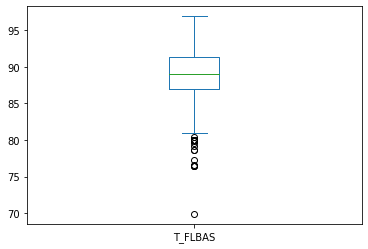

In [ ]:
data['T_FLBAS'].plot.box()

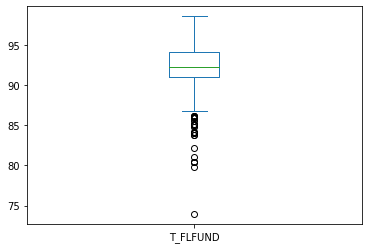

In [ ]:
data['T_FLFUND'].plot.box()

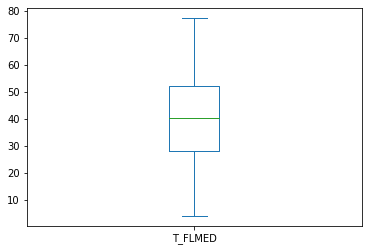

In [ ]:
data['T_FLMED'].plot.box()

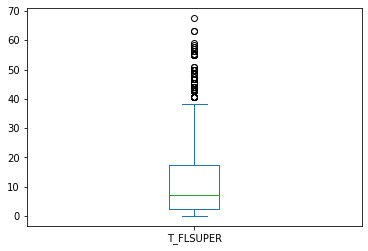

In [ ]:
data['T_FLSUPER'].plot.box()

Houveram diferenças significativas entre os valores dos dois primeiros plots da taxa líquida e os dois primeiros no caso da taxa bruta. Isso pode ser melhor compreendido pelo método de classificação da amostragem para diferenciar os dados brutos dos líquidos, e pode ser encontrado na definição no dicionário.

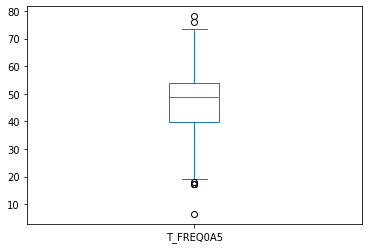

In [ ]:
data['T_FREQ0A5'].plot.box()

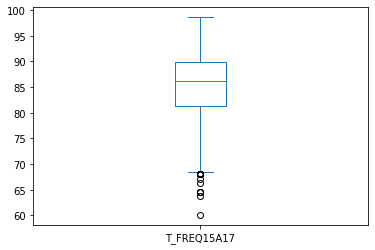

In [ ]:
data['T_FREQ15A17'].plot.box()

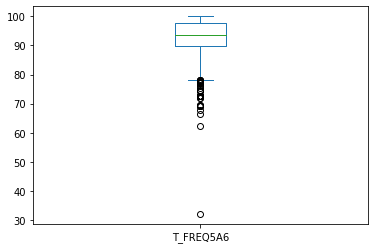

In [ ]:
data['T_FREQ5A6'].plot.box()

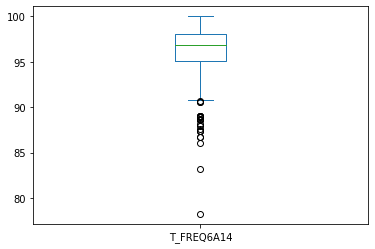

In [ ]:
data['T_FREQ6A14'].plot.box()

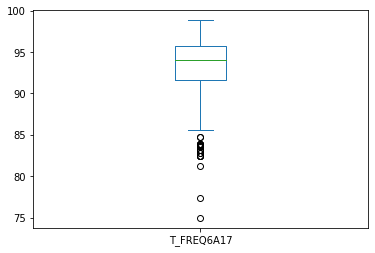

In [ ]:
data['T_FREQ6A17'].plot.box()

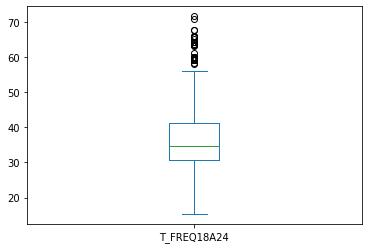

In [ ]:
data['T_FREQ18A24'].plot.box()

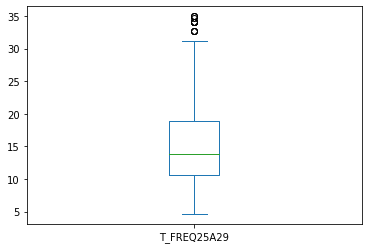

In [ ]:
data['T_FREQ25A29'].plot.box()

Perceptível como a discrepância nesses últimos dois casos vão para cima, enquanto as dos outros vão para baixo. Isso demonstra como os alunos do ensino superior na RMR ainda se concentram em determinados bairros, e como muitos bairros tem um ensino básico defasado.

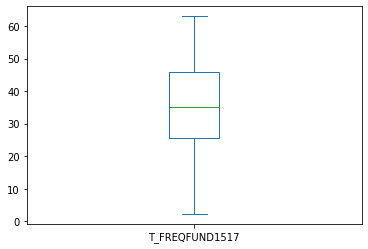

In [ ]:
data['T_FREQFUND1517'].plot.box()

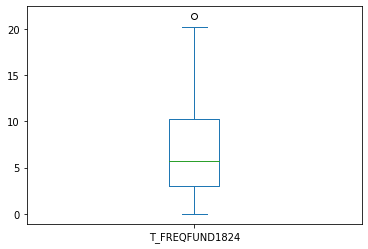

In [ ]:
data['T_FREQFUND1824'].plot.box()

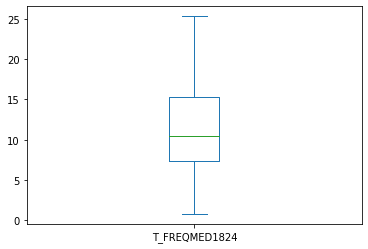

In [ ]:
data['T_FREQMED1824'].plot.box()

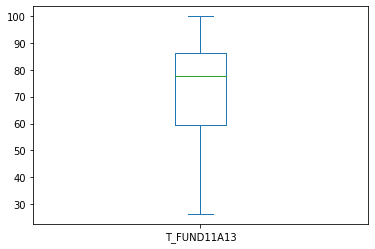

In [ ]:
data['T_FUND11A13'].plot.box()

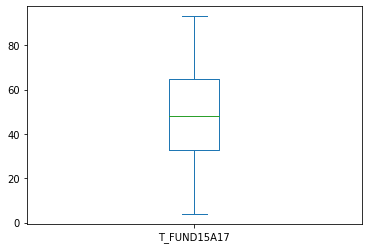

In [ ]:
data['T_FUND15A17'].plot.box()

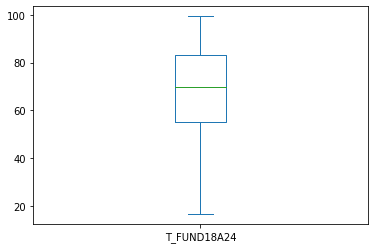

In [ ]:
data['T_FUND18A24'].plot.box()

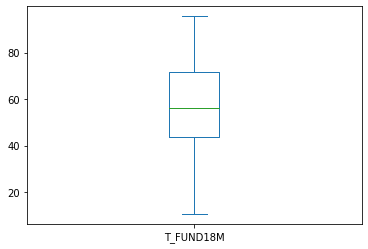

In [ ]:
data['T_FUND18M'].plot.box()

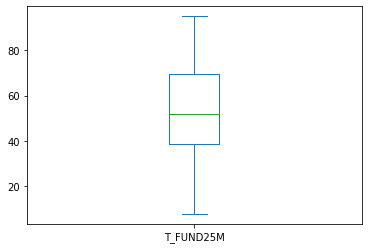

In [ ]:
data['T_FUND25M'].plot.box()

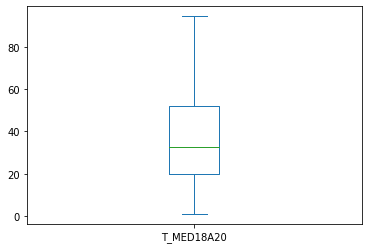

In [ ]:
data['T_MED18A20'].plot.box()

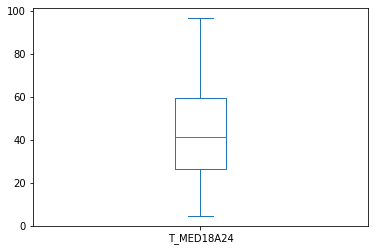

In [ ]:
data['T_MED18A24'].plot.box()

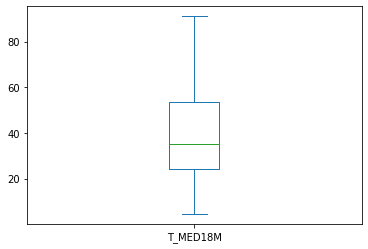

In [ ]:
data['T_MED18M'].plot.box()

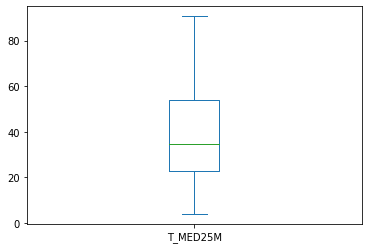

In [ ]:
data['T_MED25M'].plot.box()

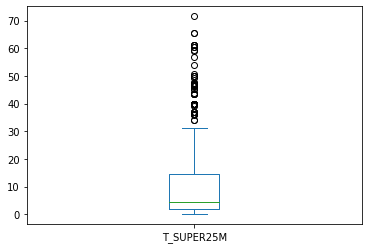

In [ ]:
data['T_SUPER25M'].plot.box()

In [ ]:
data['T_SUPER25M_LOG'] = data['T_SUPER25M']
data[abs(data['T_SUPER25M_LOG']-data['T_SUPER25M_LOG'].median())/data['T_SUPER25M_LOG'].mad() > 3.5]

,NOME_UDH,CODMUN6,NOME_MUN,ANO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FBBAS,T_FBFUND,T_FBMED,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ0A5,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ5A6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQMED1824,T_FUND11A13,T_FUND15A17,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,THEIL,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_SERV,P_SIUP,P_TRANSF,CPR,EMP,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA1014,PEA1517,PEA18M,PESORUR,PESOTOT,PESOURB,POP,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,ESCALA_IDHM,RAZDEP_LOG,T_ENV_LOG,E_ANOSESTUDO_LOG,T_ANALF25A29_LOG,T_FBMED_LOG,T_FBSUPER_LOG,T_SUPER25M_LOG
29,São Francisco : Sapucaia / Rua da Olaria,260290.0,Cabo de Santo Agostinho (PE),2000.0,77.74,1.20,16.5,21.04,95.18,88.05,48.30,7.73,11.00,3.16,2.67,9.19,2.88,9.83,3.49,11.38,9.45,5.96,105.72,109.61,96.56,74.82,94.31,97.77,69.80,48.85,53.16,91.18,60.11,26.89,97.87,98.95,96.63,15.62,1.87,7.20,86.33,78.54,90.30,88.35,87.94,71.93,76.49,80.19,80.97,47.36,1054.13,2130.22,3290.67,5661.06,8133.71,0.57,0.25,0.73,1.200000,2.17,3.96,5.950000,45.69,2.53,60.08,9.46,21.08,39.92,69.08,19.31,12.70,4617.04,0.64,1.63,20.66,3.55,0.17,64.49,0.85,7.58,22.82,23.20,100.00,97.91,7.55,99.41,100.0,0.28,0.0,16,30,35,24,20,20,26,17,12,13,10,26,7,8,8,2,5,273,19,28,26,23,23,29,28,14,16,10,13,20,17,9,8,3,3,284,1,5,247,0,556,556,554,0.884,0.837,0.908,0.852,0.879,1.000,Muito Alto,1.683947,0.888179,1.041393,3.49,1.984797,74.82,47.36
113,Piedade : Orla / Av. Barreto de Menezes,260790.0,Jaboatão dos Guararapes (PE),2000.0,77.74,1.20,16.5,21.04,95.18,88.05,33.21,4.58,11.00,1.45,0.69,1.87,1.95,1.98,3.45,1.99,9.45,5.96,105.72,109.61,96.56,74.82,94.31,97.77,69.80,48.85,53.16,91.18,60.11,26.89,97.87,98.95,96.63,15.62,1.87,7.20,86.33,78.54,90.30,88.35,87.94,71.93,76.49,80.19,80.97,47.36,1054.13,2130.22,3290.67,5661.06,8133.71,0.57,0.25,0.73,1.200000,2.17,3.96,5.950000,45.69,2.53,60.08,9.46,21.08,39.92,69.08,19.31,12.70,4617.04,0.64,1.63,20.66,3.55,0.17,64.49,0.85,7.58,22.82,23.20,100.00,97.91,7.55,99.41,100.0,0.28,0.0,35,37,61,56,33,20,34,43,44,35,20,38,13,9,9,4,2,489,31,50,64,71,40,40,56,54,60,34,20,26,12,6,11,4,7,582,2,9,505,0,1070,1070,1065,0.884,0.837,0.908,0.852,0.879,1.000,Muito Alto,1.521269,0.660865,1.041393,3.45,1.984797,74.82,47.36
114,Piedade : Orla / Hotel Dorisol,260790.0,Jaboatão dos Guararapes (PE),2000.0,77.74,1.20,16.5,21.04,95.18,88.05,39.21,6.10,11.00,0.84,0.00,1.15,2.24,1.26,0.88,1.03,9.45,5.96,105.72,109.61,96.56,74.82,94.31,97.77,69.80,48.85,53.16,91.18,60.11,26.89,97.87,98.95,96.63,15.62,1.87,7.20,86.33,78.54,90.30,88.35,87.94,71.93,76.49,80.19,80.97,47.36,1054.13,2130.22,3290.67,5661.06,8133.71,0.57,0.25,0.73,1.200000,2.17,3.96,5.950000,45.69,2.53,60.08,9.46,21.08,39.92,69.08,19.31,12.70,4617.04,0.64,1.63,20.66,3.55,0.17,64.49,0.85,7.58,22.82,23.20,99.52,97.91,7.55,99.41,100.0,0.28,0.0,31,34,45,39,23,30,32,34,36,20,15,30,10,7,6,4,2,395,25,38,42,42,34,34,47,38,32,25,18,27,11,10,14,5,5,442,1,7,387,0,837,837,834,0.884,0.837,0.908,0.852,0.879,1.000,Muito Alto,1.593397,0.785330,1.041393,0.88,1.984797,74.82,47.36
115,Piedade : Orla / Shopping Guararapes,260790.0,Jaboatão dos Guararapes (PE),2000.0,77.15,1.30,17.7,22.61,94.83,87.25,37.13,7.93,11.33,0.78,0.19,2.04,1.21,2.18,1.45,2.42,9.30,8.09,108.32,

Em sua maioria são bairros mais ricos ou próximos a universidades federais.

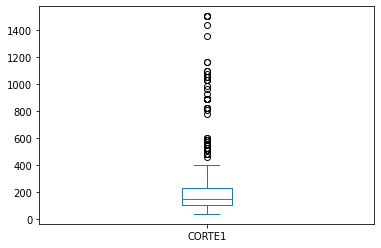

In [ ]:
data['CORTE1'].plot.box()

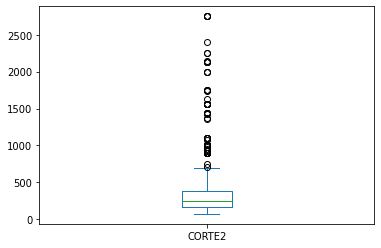

In [ ]:
data['CORTE2'].plot.box()

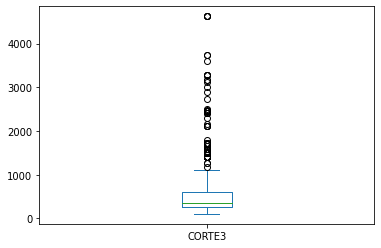

In [ ]:
data['CORTE3'].plot.box()

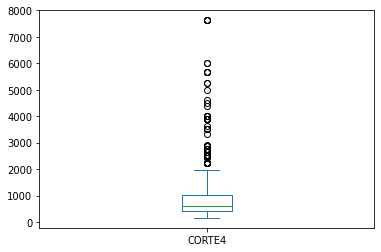

In [ ]:
data['CORTE4'].plot.box()

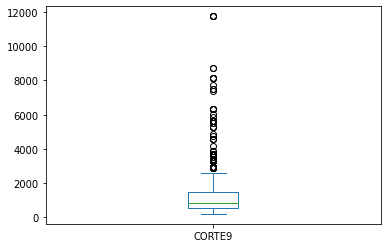

In [ ]:
data['CORTE9'].plot.box()

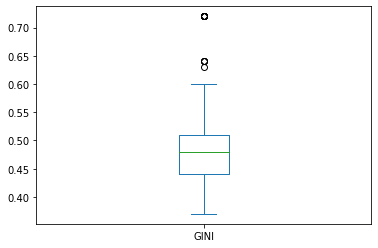

In [ ]:
data['GINI'].plot.box()

Nenhum dos outliers acima são estranhos. Eles apenas representam a concentração de renda nos bairros mais ricos da RMR, e como são discrepantes frente a realidade geral.

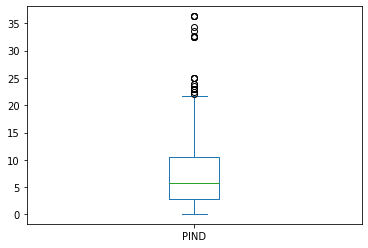

In [ ]:
data['PIND'].plot.box()

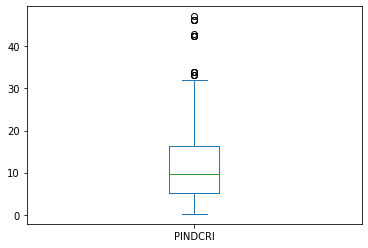

In [ ]:
data['PINDCRI'].plot.box()

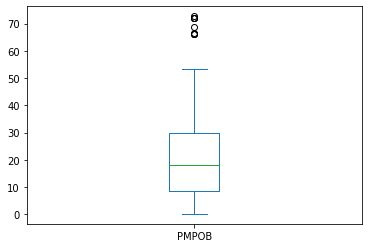

In [ ]:
data['PMPOB'].plot.box()

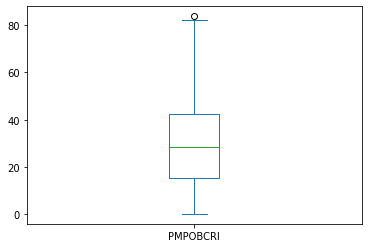

In [ ]:
data['PMPOBCRI'].plot.box()

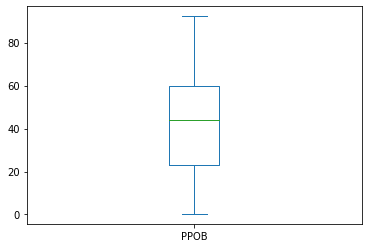

In [ ]:
data['PPOB'].plot.box()

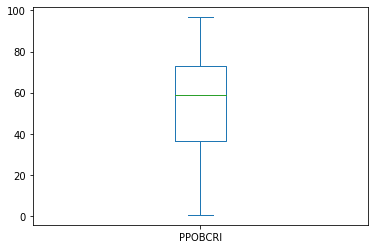

In [ ]:
data['PPOBCRI'].plot.box()

Os outliers aqui apenas mostram uma triste realidade: certos bairros são extremamente mais pobres que outros.

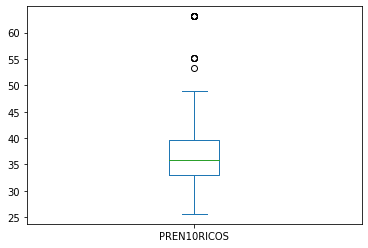

In [ ]:
data['PREN10RICOS'].plot.box()

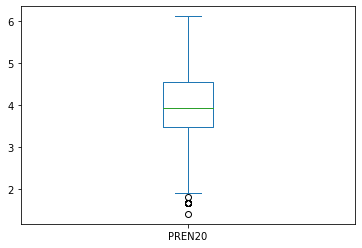

In [ ]:
data['PREN20'].plot.box()

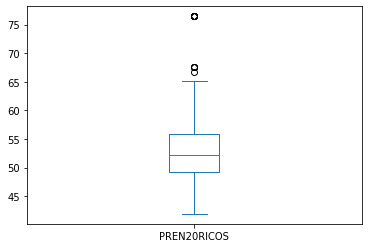

In [ ]:
data['PREN20RICOS'].plot.box()

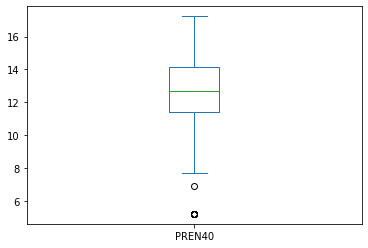

In [ ]:
data['PREN40'].plot.box()

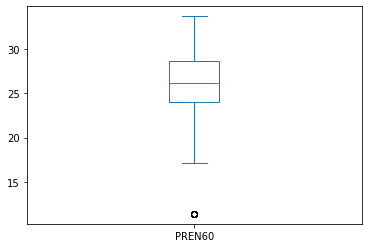

In [ ]:
data['PREN60'].plot.box()

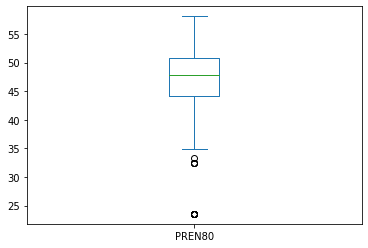

In [ ]:
data['PREN80'].plot.box()

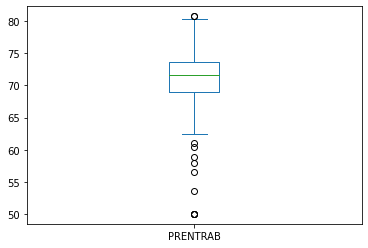

In [ ]:
data['PRENTRAB'].plot.box()

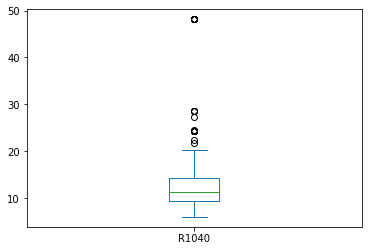

In [ ]:
data['R1040'].plot.box()

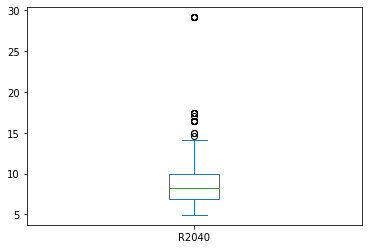

In [ ]:
data['R2040'].plot.box()

Todos os outliers acima representam apenas que bairros muito ricos e muito pobres se encontram nos conjuntos que mostram as proporções entre ricos e pobres, demonstrando uma enorme desigualdade social e de renda, como será percebido pelos outliers abaixo:

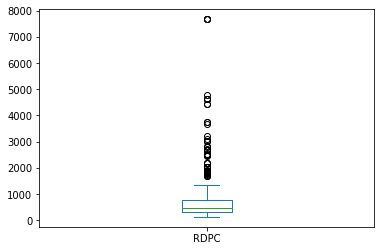

In [ ]:
data['RDPC'].plot.box()

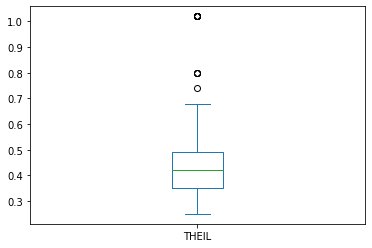

In [ ]:
data['THEIL'].plot.box()

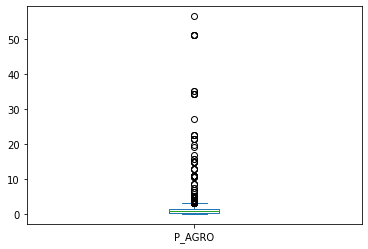

In [ ]:
data['P_AGRO'].plot.box()

Determinados bairros são gritantemente mais rurais, com trabalhadores mais focados no agronegócio e agricultura familiar e de subsistência.

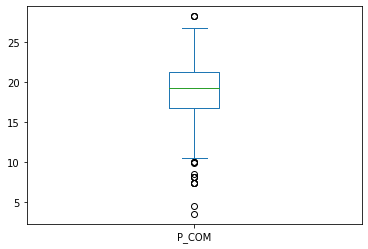

In [ ]:
data['P_COM'].plot.box()

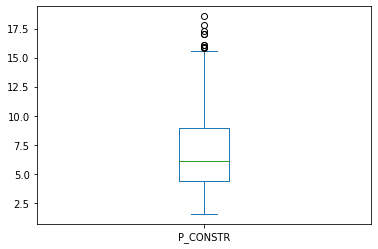

In [ ]:
data['P_CONSTR'].plot.box()

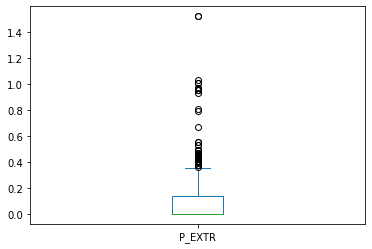

In [ ]:
data['P_EXTR'].plot.box()

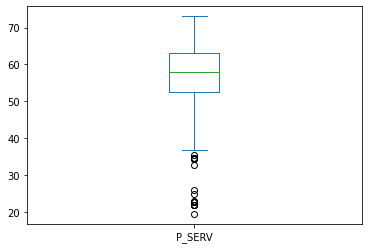

In [ ]:
data['P_SERV'].plot.box()

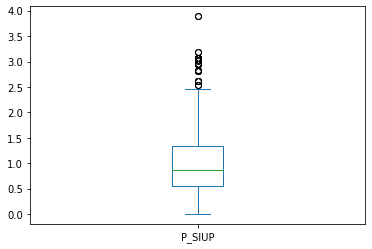

In [ ]:
data['P_SIUP'].plot.box()

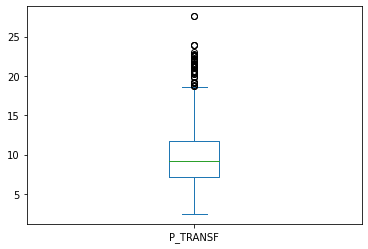

In [ ]:
data['P_TRANSF'].plot.box()

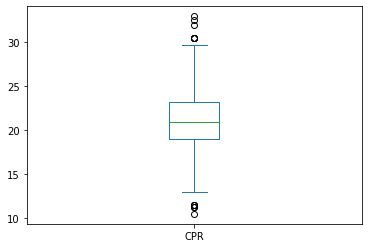

In [ ]:
data['CPR'].plot.box()

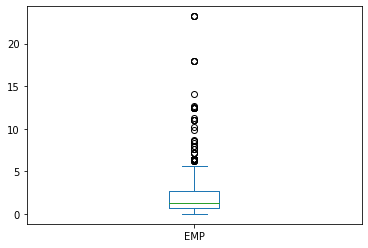

In [ ]:
data['EMP'].plot.box()

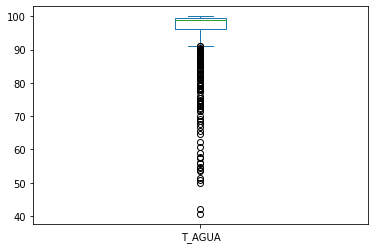

In [ ]:
data['T_AGUA'].plot.box()

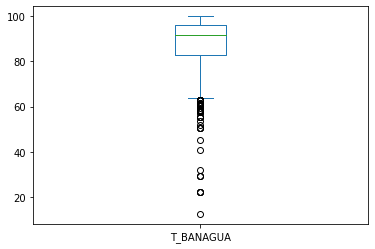

In [ ]:
data['T_BANAGUA'].plot.box()

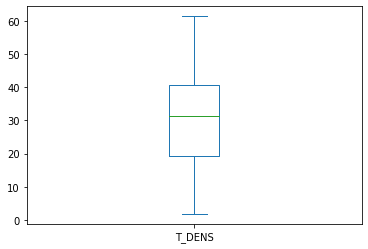

In [ ]:
data['T_DENS'].plot.box()

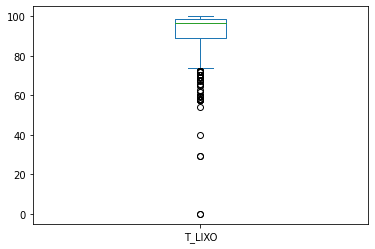

In [ ]:
data['T_LIXO'].plot.box()

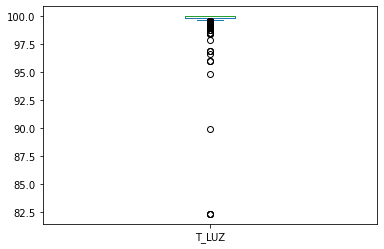

In [ ]:
data['T_LUZ'].plot.box()

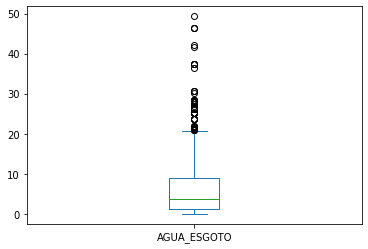

In [ ]:
data['AGUA_ESGOTO'].plot.box()

Novamente, todos os outliers acima não são erros de medição. São apenas a realidade desigual da RMR.

Considerando esses fatores, podemos concluir nossa investigação por outliers aqui, compreendendo que em sua grande maioria tais dados apenas apresentam a concentração de capital intelectual, econômico e social de determinados bairros em total detrimento de outros. Nesta fase, de certa forma, nós já fizemos uma pequena análise e visualização dos dados. Vamos para uma visualização melhor na próxima fase.

# 3. Análise dos dados e Visualização dos dados

In [ ]:
data.head()

,NOME_UDH,CODMUN6,NOME_MUN,ANO,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FBBAS,T_FBFUND,T_FBMED,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ0A5,T_FREQ15A17,T_FREQ18A24,T_FREQ25A29,T_FREQ5A6,T_FREQ6A14,T_FREQ6A17,T_FREQFUND1517,T_FREQFUND1824,T_FREQMED1824,T_FUND11A13,T_FUND15A17,T_FUND18A24,T_FUND18M,T_FUND25M,T_MED18A20,T_MED18A24,T_MED18M,T_MED25M,T_SUPER25M,CORTE1,CORTE2,CORTE3,CORTE4,CORTE9,GINI,PIND,PINDCRI,PMPOB,PMPOBCRI,PPOB,PPOBCRI,PREN10RICOS,PREN20,PREN20RICOS,PREN40,PREN60,PREN80,PRENTRAB,R1040,R2040,RDPC,THEIL,P_AGRO,P_COM,P_CONSTR,P_EXTR,P_SERV,P_SIUP,P_TRANSF,CPR,EMP,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,T_SLUZ,HOMEM0A4,HOMEM10A14,HOMEM15A19,HOMEM20A24,HOMEM25A29,HOMEM30A34,HOMEM35A39,HOMEM40A44,HOMEM45A49,HOMEM50A54,HOMEM55A59,HOMEM5A9,HOMEM60A64,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,MULH30A34,MULH35A39,MULH40A44,MULH45A49,MULH50A54,MULH55A59,MULH5A9,MULH60A64,MULH65A69,MULH70A74,MULH75A79,MULHER80,MULHERTOT,PEA1014,PEA1517,PEA18M,PESORUR,PESOTOT,PESOURB,POP,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,ESCALA_IDHM,RAZDEP_LOG,T_ENV_LOG,E_ANOSESTUDO_LOG,T_ANALF25A29_LOG,T_FBMED_LOG,T_FBSUPER_LOG,T_SUPER25M_LOG
0,Centro / Alto da Bela Vista / Timbó : BR 101,260005.0,Abreu E Lima (PE),2000.0,68.90,1.95,39.5,50.04,88.96,75.03,47.56,7.18,9.56,3.12,2.30,12.08,4.30,12.88,4.65,15.02,27.47,18.83,118.00,127.19,93.01,5.71,89.04,91.23,33.74,1.96,38.06,87.88,36.77,9.71,85.49,93.61,92.07,46.74,12.50,18.72,72.50,40.83,58.59,45.08,41.49,22.16,26.94,23.60,22.72,2.07,117.13,183.50,292.81,460.69,694.67,0.48,8.88,13.32,24.22,34.20,54.43,67.53,36.65,4.04,53.35,12.88,26.16,46.65,73.94,11.38,8.28,347.30,0.41,2.02,17.26,5.13,0.0,50.76,0.71,20.70,21.58,1.90,98.99,91.95,36.73,89.81,100.00,4.94,0.00,198,191,229,207,205,197,174,146,102,85,68,183,66,49,41,26,20,2185,194,210,227,242,228,216,194,165,123,104,86,185,77,73,51,31,42,2446,19,49,1935,0,4631,4631,4627,0.451,0.552,0.612,0.516,0.732,0.606,Baixo,1.677242,0.856124,0.980458,4.65,1.968530,5.71,2.07
1,Desterro / Matinha / Fosfato : Vila da Caixa /...,260005.0,Abreu E Lima (PE),2000.0,68.90,1.95,39.5,50.04,88.96,75.03,48.59,5.68,9.56,4.70,2.21,11.63,3.55,12.40,4.27,14.75,27.47,18.83,118.00,127.19,93.01,5.71,89.04,91.23,33.74,1.96,38.06,87.88,36.77,9.71,85.49,93.61,92.07,46.74,12.50,18.72,72.50,40.83,58.59,45.08,41.49,22.16,26.94,23.60,22.72,2.07,117.13,183.50,292.81,460.69,694.67,0.48,8.88,13.32,24.22,34.20,54.43,67.53,36.65,4.04,53.35,12.88,26.16,46.65,73.94,11.38,8.28,347.30,0.41,2.02,17.26,5.13,0.0,50.76,0.71,20.70,21.58,1.90,98.75,91.95,36.73,89.81,100.00,4.94,0.00,357,387,337,391,379,337,302,215,169,145,117,349,95,65,54,35,37,3767,349,353,384,430,394,373,328,237,208,180,144,321,112,86,79,43,49,4065,35,81,3188,0,7832,7832,7790,0.451,0.552,0.612,0.516,0.732,0.606,Baixo,1.686547,0.754348,0.980458,4.27,1.968530,5.71,2.07
2,Centro / Timbó / Alto São Miguel / Jardim Caet...,260005.0,Abreu E Lima (PE),2000.0,67.31,2.18,44.8,56.69,87.60,72.48,49.15,6.52,9.21,4.38,3.02,13.06,3.28,13.93,5.71,16.62,32.00,23.46,117.85,134.76,75.97,0.99,89.01,94.96,24.32,0.19,38.69,75.70,34.93,6.28,94.15,98.02,91.60,48.75,11.70,19.97,64.83,29.77,54.94,38.99,34.70,13.66,22.61,18.12,16.91,1.24,87.84,156.17,234.25,342.59,517.30,0.44,11.94,17.65,33.54,44.74,64.74,73.32,32.68,4.49,48.69,14.34,29.18,51.31,70.27,9.12,6.79,256.49,0.33,2.10,17.72,9.35,0.0,41.38,0.63,23.97,25.47,1.33,99.23,87.73,40.17,94.18,100.00,6.74,0.00,515,445,506,529,484,475,393,324,224,209,146,461,131,104,80,43,48,5113,463,526,533,540,533,520,407,365,283,264,185,444,192,138,120,87,86,5683,22,151,4235,0,10795,10795,10788,0.390,0.506,0.567,0.464,0.705,0.557,Muito Baixo,1.691524,0.814248,0.964260,5.71,1.880642,0.99,1.24
3,Planalto : Rua Almirante Tamandaré,260005.0,Abreu E Lima (PE),2000.0,67.31,2.18,44.8,56.69,87.60,72.48,7

Vamos remover as colunas de log geradas na fase anterior:

In [ ]:
data = data.drop(columns=["RAZDEP_LOG", "T_ENV_LOG", "E_ANOSESTUDO_LOG", "T_ANALF25A29_LOG", "T_FBMED_LOG", "T_FBSUPER_LOG", "T_SUPER25M_LOG"])

Vamos verificar se houve muita mudança nos IDHM do ano 2000 para o ano 2010:

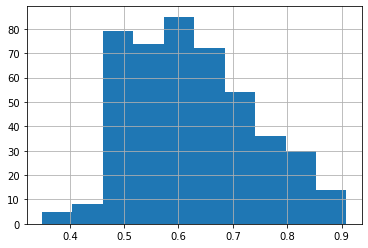

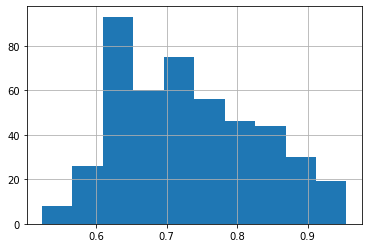

In [ ]:
data2000 = data.loc[data['ANO'] == 2000];
data2010 = data.loc[data['ANO'] == 2010];
data2000['IDHM'].hist()
plt.show()
data2010['IDHM'].hist()

Conseguimos perceber que houveram algumas variações nos IDHMs de alguns bairros.

Vamos visualizar os municípios com mais proporção de pessoas pobres no ano 2000 e no ano 2010:

In [ ]:
data2000['NOME_MUN'].unique()

['Abreu E Lima (PE)', 'Araçoiaba (PE)', 'Cabo de Santo Agostinho (PE)', 'Camaragibe (PE)', 'Igarassu (PE)', ..., 'Moreno (PE)', 'Olinda (PE)', 'Paulista (PE)', 'Recife (PE)', 'São Lourenço da Mata (PE)']
Length: 14
Categories (14, object): ['Abreu E Lima (PE)', 'Araçoiaba (PE)', 'Cabo de Santo Agostinho (PE)',
                          'Camaragibe (PE)', ..., 'Olinda (PE)', 'Paulista (PE)', 'Recife (PE)',
                          'São Lourenço da Mata (PE)']

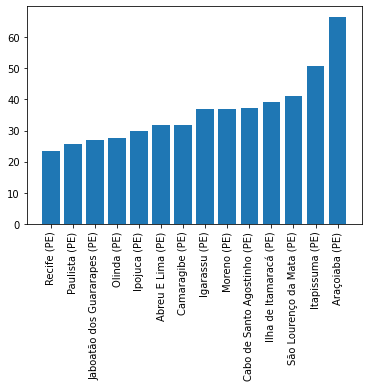

In [ ]:
def sorted_tuple(a):
    return a[1]
    
data_to_graph = sorted([(i, data2000.loc[data2000['NOME_MUN'] == i]['PMPOB'].mean()) for i in data2000['NOME_MUN'].unique()], key=sorted_tuple)
plt.bar(range(len(data_to_graph)), [val[1] for val in data_to_graph], align='center')
plt.xticks(range(len(data_to_graph)), [val[0] for val in data_to_graph])
plt.xticks(rotation=90)
plt.show()

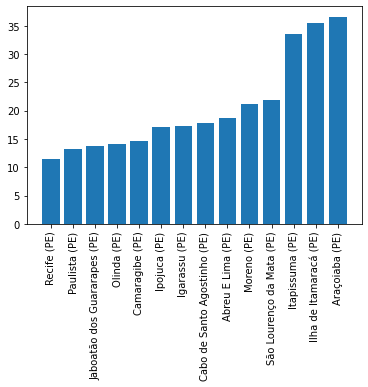

In [ ]:
data_to_graph = sorted([(i, data2010.loc[data2010['NOME_MUN'] == i]['PMPOB'].mean()) for i in data2010['NOME_MUN'].unique()], key=sorted_tuple)
plt.bar(range(len(data_to_graph)), [val[1] for val in data_to_graph], align='center')
plt.xticks(range(len(data_to_graph)), [val[0] for val in data_to_graph])
plt.xticks(rotation=90)
plt.show()

A proporção geral de pessoas pobres pareceu diminuir em todos os municípios, e algumas mudanças puderam ser percebidas na ordem das listas.

Vamos analisar as pirâmides etárias do município de Recife nos anos 2000 e 2010:

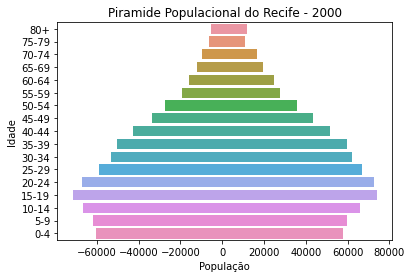

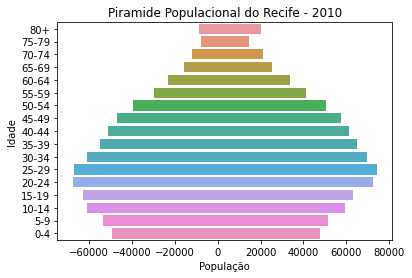

In [ ]:
import seaborn as sns

age_class = ['80+','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']
recife_dataset = data2000.loc[data['NOME_MUN'] == 'Recife (PE)'];
male_columns = ["HOMEM0A4", "HOMEM5A9", "HOMEM10A14", "HOMEM15A19", "HOMEM20A24", "HOMEM25A29", "HOMEM30A34", "HOMEM35A39", "HOMEM40A44", "HOMEM45A49", "HOMEM50A54", "HOMEM55A59", "HOMEM60A64", "HOMEM65A69", "HOMEM70A74", "HOMEM75A79", "HOMENS80"]
female_columns = ["MULH0A4", "MULH5A9", "MULH10A14", "MULH15A19", "MULH20A24", "MULH25A29", "MULH30A34", "MULH35A39", "MULH40A44", "MULH45A49", "MULH50A54", "MULH55A59", "MULH60A64", "MULH65A69", "MULH70A74", "MULH75A79", "MULHER80"]

male_data = [-x for x in recife_dataset[male_columns].sum()]
female_data = [x for x in recife_dataset[female_columns].sum()]

py_df = pd.DataFrame({'Idade': list(reversed(age_class)), 
                    'Homens': male_data, 
                    'Mulheres': female_data})

bar_plot = sns.barplot(x='Homens', y='Idade', data=py_df, order=age_class)
bar_plot = sns.barplot(x='Mulheres', y='Idade', data=py_df, order=age_class)
bar_plot.set(xlabel="População", ylabel="Idade", title = "Piramide Populacional do Recife - 2000")

plt.show()

recife_dataset = data2010.loc[data['NOME_MUN'] == 'Recife (PE)'];

male_data = [-x for x in recife_dataset[male_columns].sum()]
female_data = [x for x in recife_dataset[female_columns].sum()]

py_df = pd.DataFrame({'Idade': list(reversed(age_class)), 
                    'Homens': male_data, 
                    'Mulheres': female_data})

bar_plot = sns.barplot(x='Homens', y='Idade', data=py_df, order=age_class)
bar_plot = sns.barplot(x='Mulheres', y='Idade', data=py_df, order=age_class)
bar_plot.set(xlabel="População", ylabel="Idade", title = "Piramide Populacional do Recife - 2010")

plt.show()

Houve um significativo aumento de população jovem e adulta, bem como um pequeno aumento da população idosa.

Vamos analisar, no ano de 2010, as proporções de trabalhadores por setores em três municípios: Recife, Jaboatão dos Guararapes e Araçoiaba:

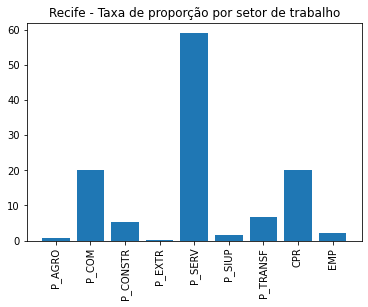

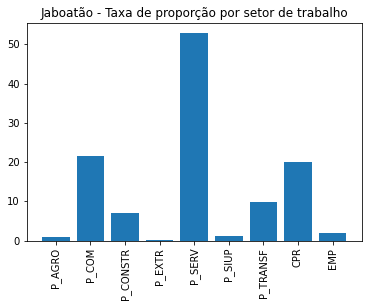

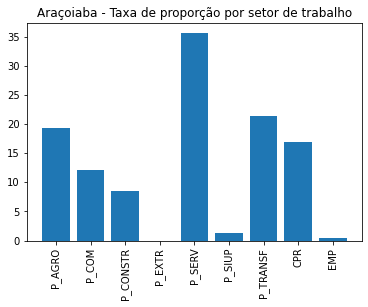

In [ ]:
recife_dataset = data2010.loc[data['NOME_MUN'] == 'Recife (PE)'];
jaboatao_dataset = data2010.loc[data['NOME_MUN'] == 'Jaboatão dos Guararapes (PE)'];
aracoiaba_dataset = data2010.loc[data['NOME_MUN'] == 'Araçoiaba (PE)'];

cols_names = ["P_AGRO", "P_COM", "P_CONSTR", "P_EXTR", "P_SERV", "P_SIUP", "P_TRANSF", "CPR", "EMP"]

recife_data = [x for x in recife_dataset[cols_names].mean()]
jaboatao_data = [x for x in jaboatao_dataset[cols_names].mean()]
aracoiaba_data = [x for x in aracoiaba_dataset[cols_names].mean()]

plt.bar(range(len(recife_data)), [val for val in recife_data], align='center')
plt.xticks(range(len(recife_data)), [val for val in cols_names])
plt.xticks(rotation=90)
plt.title("Recife - Taxa de proporção por setor de trabalho")
plt.show()

plt.bar(range(len(jaboatao_data)), [val for val in jaboatao_data], align='center')
plt.xticks(range(len(jaboatao_data)), [val for val in cols_names])
plt.xticks(rotation=90)
plt.title("Jaboatão - Taxa de proporção por setor de trabalho")
plt.show()

plt.bar(range(len(aracoiaba_data)), [val for val in aracoiaba_data], align='center')
plt.xticks(range(len(aracoiaba_data)), [val for val in cols_names])
plt.xticks(rotation=90)
plt.title("Araçoiaba - Taxa de proporção por setor de trabalho")
plt.show()

Vemos que a proporção do setor de Serviço é sempre maior que as outras. No município de Araiçoaba há uma proporção considerável no setor de Agricultura e no de Indústria de Transformação.

Vamos visualizar a taxa de frequência escolar por idade nos municípios de Recife, São Lourenço da Mata e Olinda:

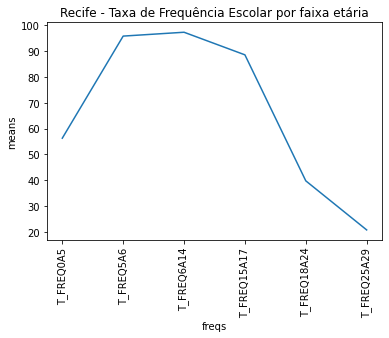

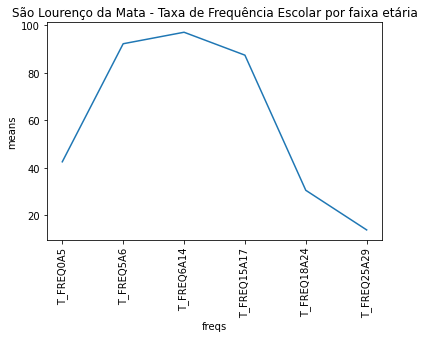

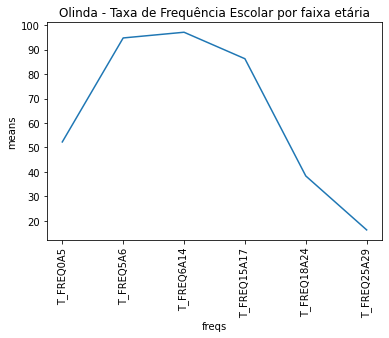

In [ ]:
cols_freq = ["T_FREQ0A5", "T_FREQ5A6", "T_FREQ6A14", "T_FREQ15A17", "T_FREQ18A24", "T_FREQ25A29"]
recife_dataset = data2010.loc[data['NOME_MUN'] == 'Recife (PE)'];
slourenco_dataset = data2010.loc[data['NOME_MUN'] == 'São Lourenço da Mata (PE)'];
olinda_dataset = data2010.loc[data['NOME_MUN'] == 'Olinda (PE)'];

recife_data = [x for x in recife_dataset[cols_freq].mean()]
slourenco_data = [x for x in slourenco_dataset[cols_freq].mean()]
olinda_data = [x for x in olinda_dataset[cols_freq].mean()]

d = {'freqs': cols_freq, 'means': recife_data}
pdline = pd.DataFrame(d)
sns.lineplot(x='freqs', y='means', data=pdline)
plt.xticks(rotation=90)
plt.title("Recife - Taxa de Frequência Escolar por faixa etária")
plt.show()

d = {'freqs': cols_freq, 'means': slourenco_data}
pdline = pd.DataFrame(d)
sns.lineplot(x='freqs', y='means', data=pdline)
plt.xticks(rotation=90)
plt.title("São Lourenço da Mata - Taxa de Frequência Escolar por faixa etária")
plt.show()

d = {'freqs': cols_freq, 'means': olinda_data}
pdline = pd.DataFrame(d)
sns.lineplot(x='freqs', y='means', data=pdline)
plt.xticks(rotation=90)
plt.title("Olinda - Taxa de Frequência Escolar por faixa etária")
plt.show()


Percebe-se que há um certo padrão nas faixas etárias que estão na escola nos três municípios.

Vamos visualizar algumas estatísticas univariadas descritivas de algumas variáveis no ano 2010:

In [ ]:
#IDHM
data2010['IDHM'].describe()

count    457.000000
mean       0.730096
std        0.096257
min        0.523000
25%        0.646000
50%        0.716000
75%        0.794000
max        0.955000
Name: IDHM, dtype: float64

In [ ]:
#Número de crianças que não sobrevivem até 1 ano de idade, para cada 1000 crianças
data2010['MORT1'].describe()

count    457.000000
mean      18.219737
std        7.271410
min        6.500000
25%       11.600000
50%       17.800000
75%       24.100000
max       34.000000
Name: MORT1, dtype: float64

Agora vamos ver algumas estatísticas bivariadas:

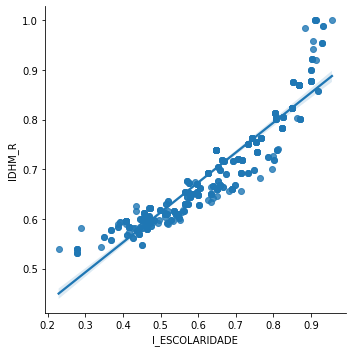

In [ ]:
sns.lmplot(x='I_ESCOLARIDADE',y='IDHM_R',data=data2010,fit_reg=True) 

Percebe-se uma tendência clara de melhor escolaridade nos bairros com IDH de renda mais alto.

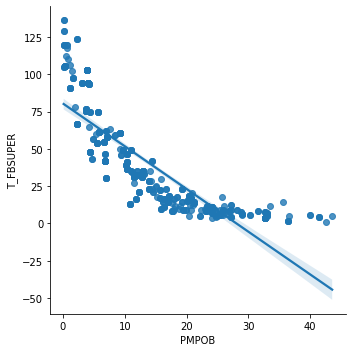

In [ ]:
sns.lmplot(x='PMPOB',y='T_FBSUPER',data=data2010,fit_reg=True) 

Vemos também que quanto mais população pobre existe em um bairro, menos ele tende a ter uma frequência bruta no ensino superior.

# 4. Testes de Hipótese

Vamos verificar se a diferença entre os IDHM de 2000 e 2010 seguem a gaussiana:

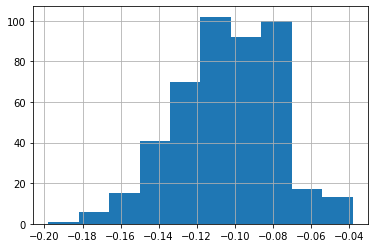

In [ ]:
data_aux = pd.DataFrame({
    'IDHM_2000': data2000['IDHM'].values,
    'IDHM_2010': data2010['IDHM'].values
})
data_aux['diff'] = data_aux['IDHM_2000'] - data_aux['IDHM_2010']
data_aux['diff'].hist()

In [ ]:
from scipy import stats
stats.shapiro(data_aux['diff'])

ShapiroResult(statistic=0.9900420904159546, pvalue=0.003462322521954775)

Verificando simetria:

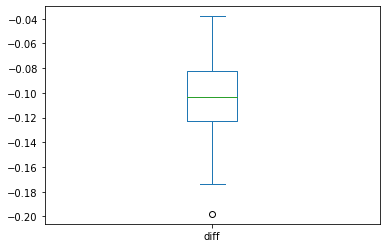

In [ ]:
data_aux[['diff']].plot(kind='box')

Vamos verificar a hipótese de que os bairros com Escada de IDHM "Alto" e "Muito Alto" têm uma taxa menor de mortalidade infantil, considerando o ano de 2010:



In [ ]:
mort_m_alt = data2010[data2010["ESCALA_IDHM"]=="Muito Alto"]['MORT5'].mean()
mort_alt = data2010[data2010["ESCALA_IDHM"]=="Alto"]['MORT5'].mean()
mort_me_alt = data2010[data2010["ESCALA_IDHM"]=="Médio"]['MORT5'].mean()
mort_b_alt = data2010[data2010["ESCALA_IDHM"]=="Baixo"]['MORT5'].mean()
mort_mb_alt = data2010[data2010["ESCALA_IDHM"]=="Muito Baixo"]['MORT5'].mean()
print("Muito Alto", mort_m_alt)
print("Alto", mort_alt)
print("Médio", mort_me_alt)
print("Baixo", mort_b_alt)
print("Muito Baixo", mort_mb_alt)

Muito Alto 11.674172661870504
Alto 18.55693548387097
Médio 24.266956521739136
Baixo 29.90318681318681
Muito Baixo 35.162727272727274


Podemos também verificar se existe uma correlação entre a Renda Per Capita Média e a Taxa de Mortalidade Infantil, considerando que pessoas mais ricas tem melhor acesso a sistemas de saúde:



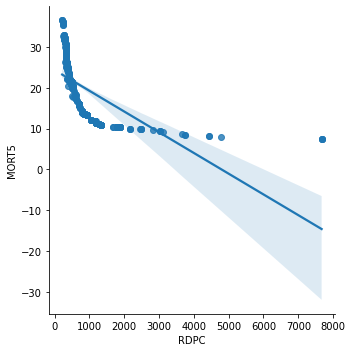

In [ ]:
sns.lmplot(x='RDPC',y='MORT5',data=data2010,fit_reg=True) 

Percebe-se uma relação clara de queda da taxa em bairros com maiores rendas per capita.

Algumas outras hipóteses foram testadas na parte de visualização.